In [1]:
import sys  
sys.path.insert(0, '..')
from AT_funs import *

In [2]:

filename = 'TIP.MI.xlsx'
df = read_xlsx(filename)
ticker = filename.replace('xlsx', '')

filename_bm = 'FTSEMIB.MI.xlsx'
bm_df = read_xlsx(filename_bm)
bm_name = filename_bm.replace('xlsx', '')

In [3]:
# filename_bm = 'FTSE_MIB.xlsx'
# bm_df = read_xlsx(filename_bm)
# bm_name = filename_bm.replace('xlsx', '')

# filename_bm = 'FTSEMIB.MI.csv'
# bm_df = read_csv(filename_bm)
# bm_name = filename_bm.replace('csv', '')

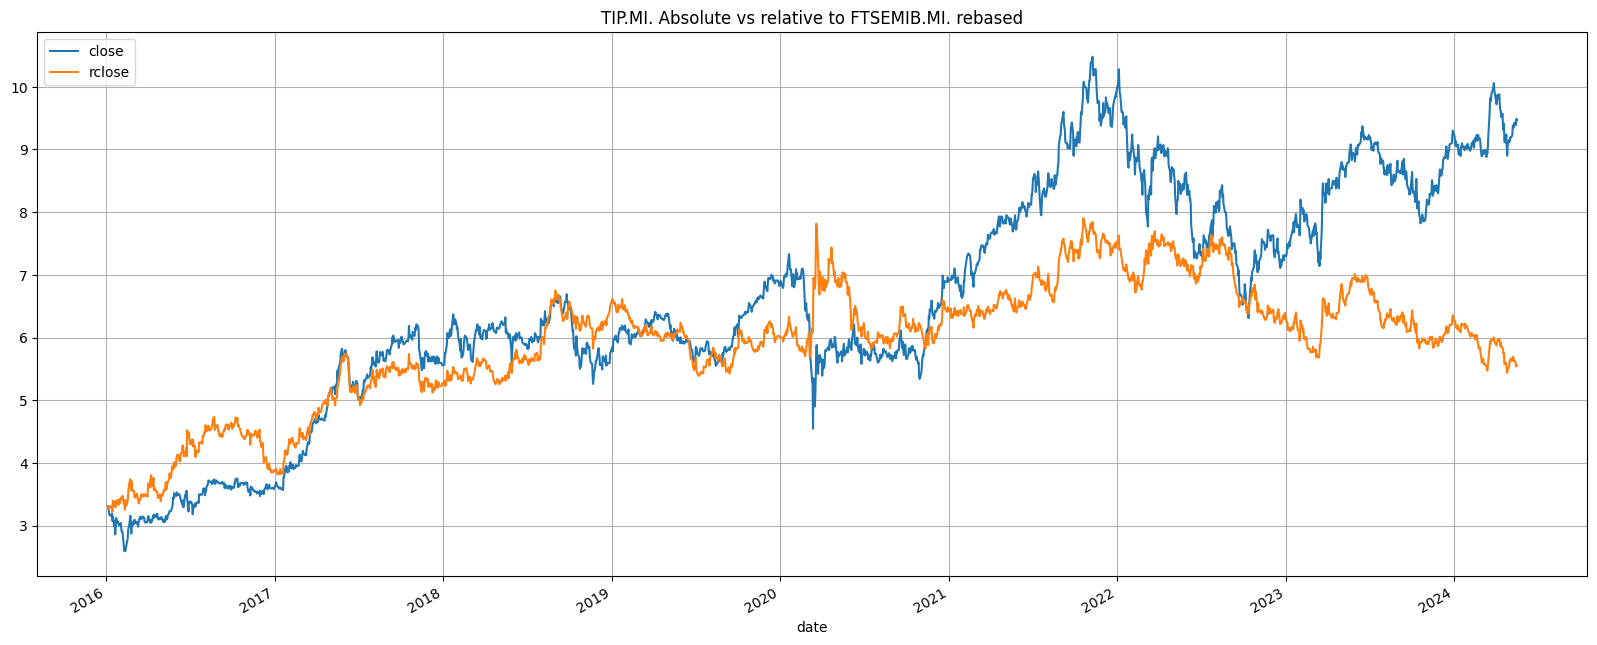

In [4]:
plot_abs_rel(df, ticker, bm_df, bm_name)

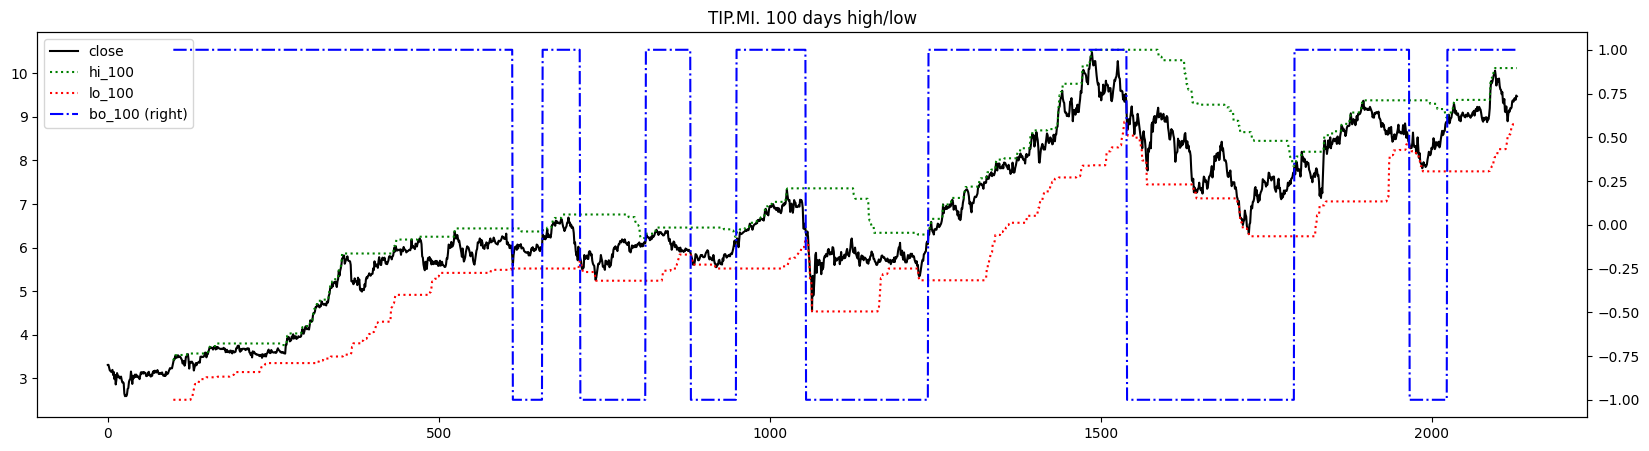

In [5]:
window_bo = 100
df_bo = df.copy()
df_bo = signal_bo(df_bo, window_bo)
bo_signal = 'bo_' + str(window_bo)
plot_signal_bo(df_bo, window_bo, ticker)

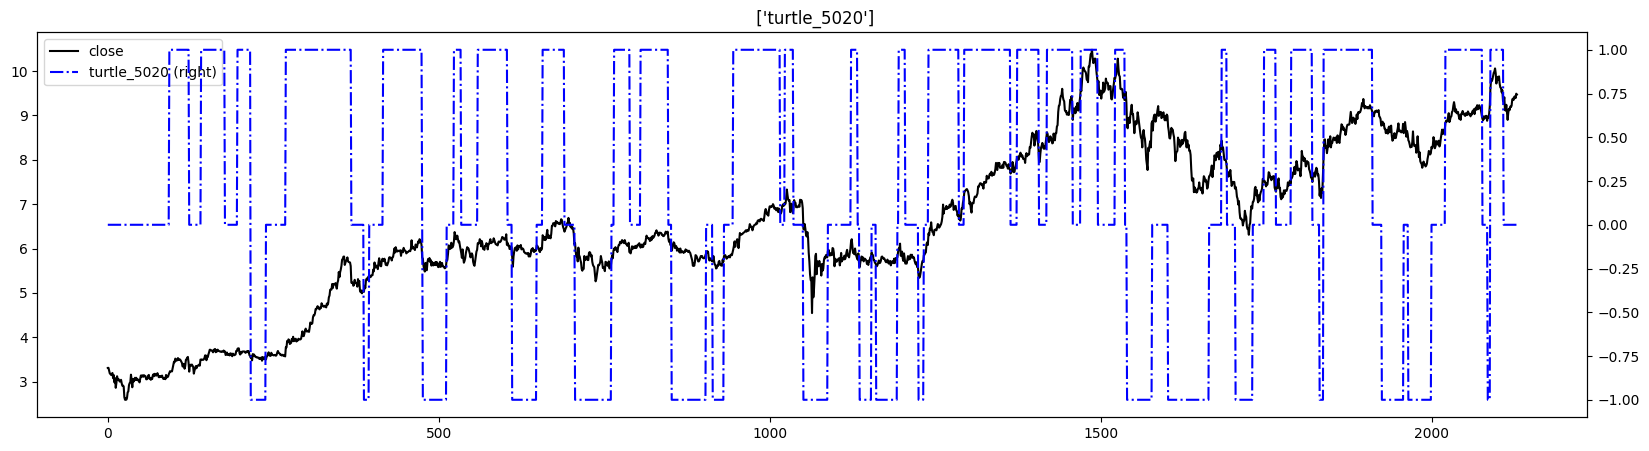

In [6]:
fast = 20
slow = 50
df_tt = df.copy()
df_tt = signal_tt(df_tt, fast = fast, slow = slow)
tt_signal = 'turtle_' + str(slow) + str(fast)
plot_signal_tt(df_tt, fast, slow)

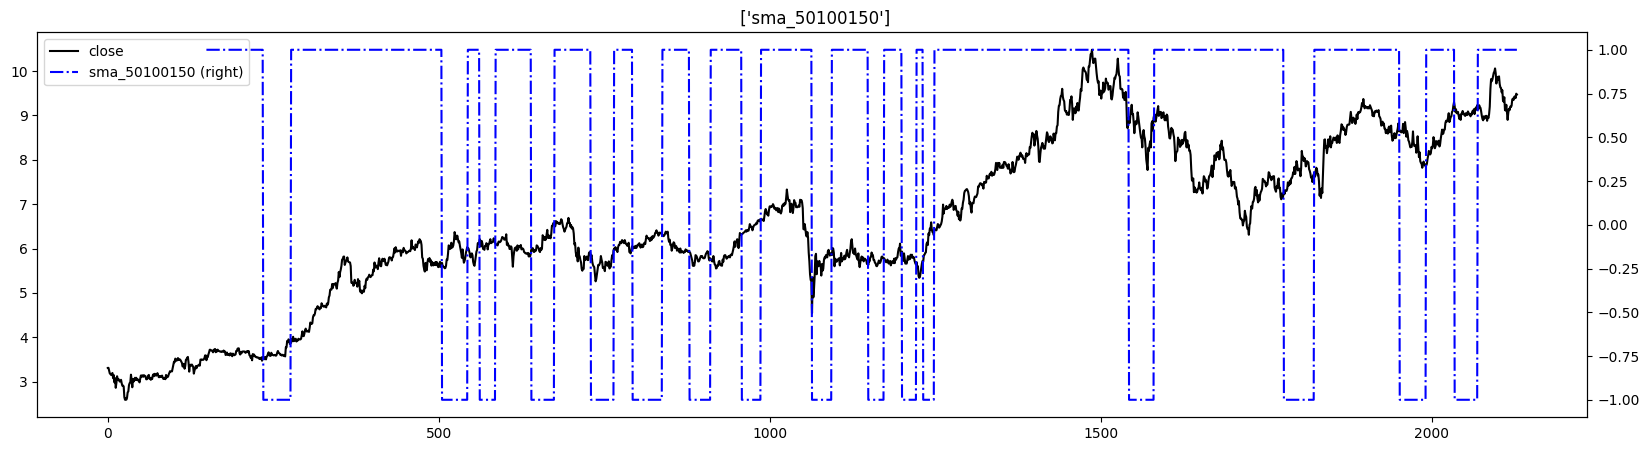

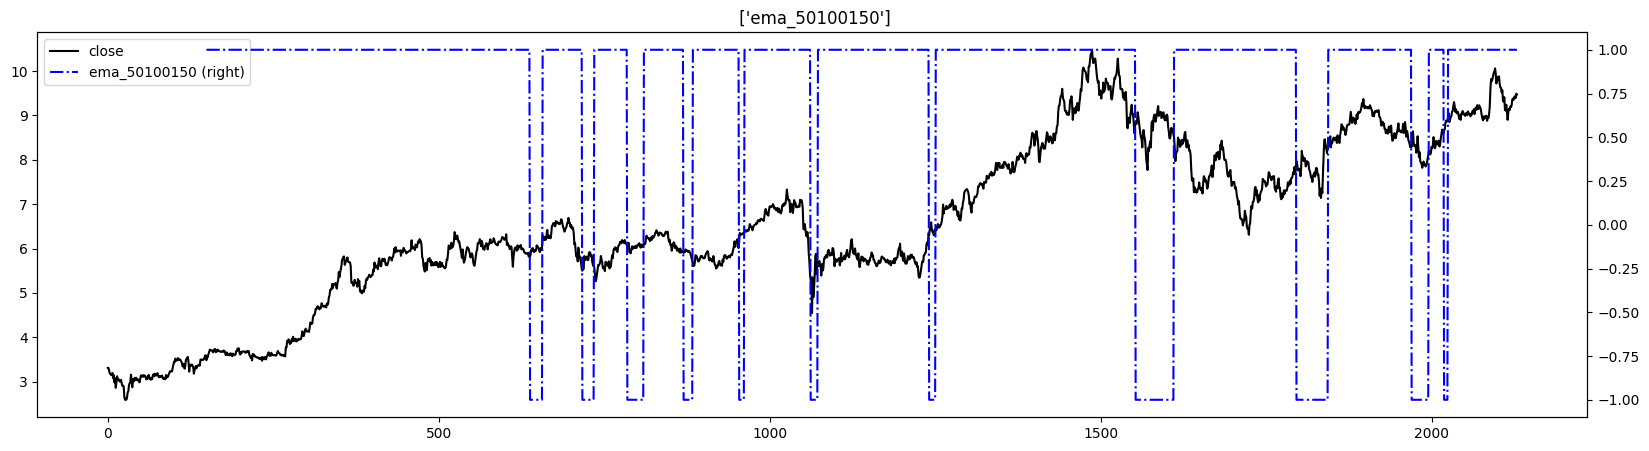

In [7]:
st = 50
mt = 100
lt = 150
df_ma = df.copy()
df_ma = signal_sma(df_ma, st, mt, lt)
df_ma = signal_ema(df_ma, st, mt, lt)

sma_signal = 'sma_' + str(st) + str(mt) + str(lt)
ema_signal = 'ema_' + str(st) + str(mt) + str(lt)

plot_signal_ma(df_ma, st, mt, lt)

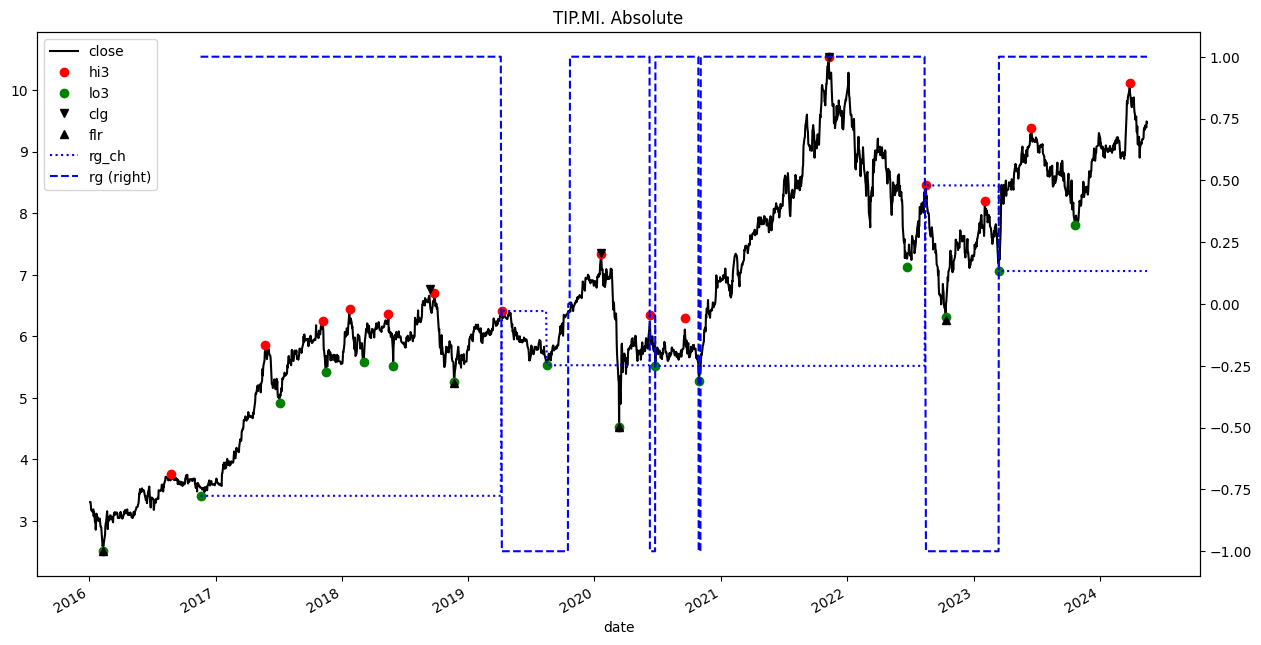

In [8]:
df_fc = df.copy()
df_fc = detect_regime(df_fc, bm_df)
fc_signal = 'rg'
fcr_signal = 'rrg'
plot_signal_abs(df_fc, ticker)

1
1


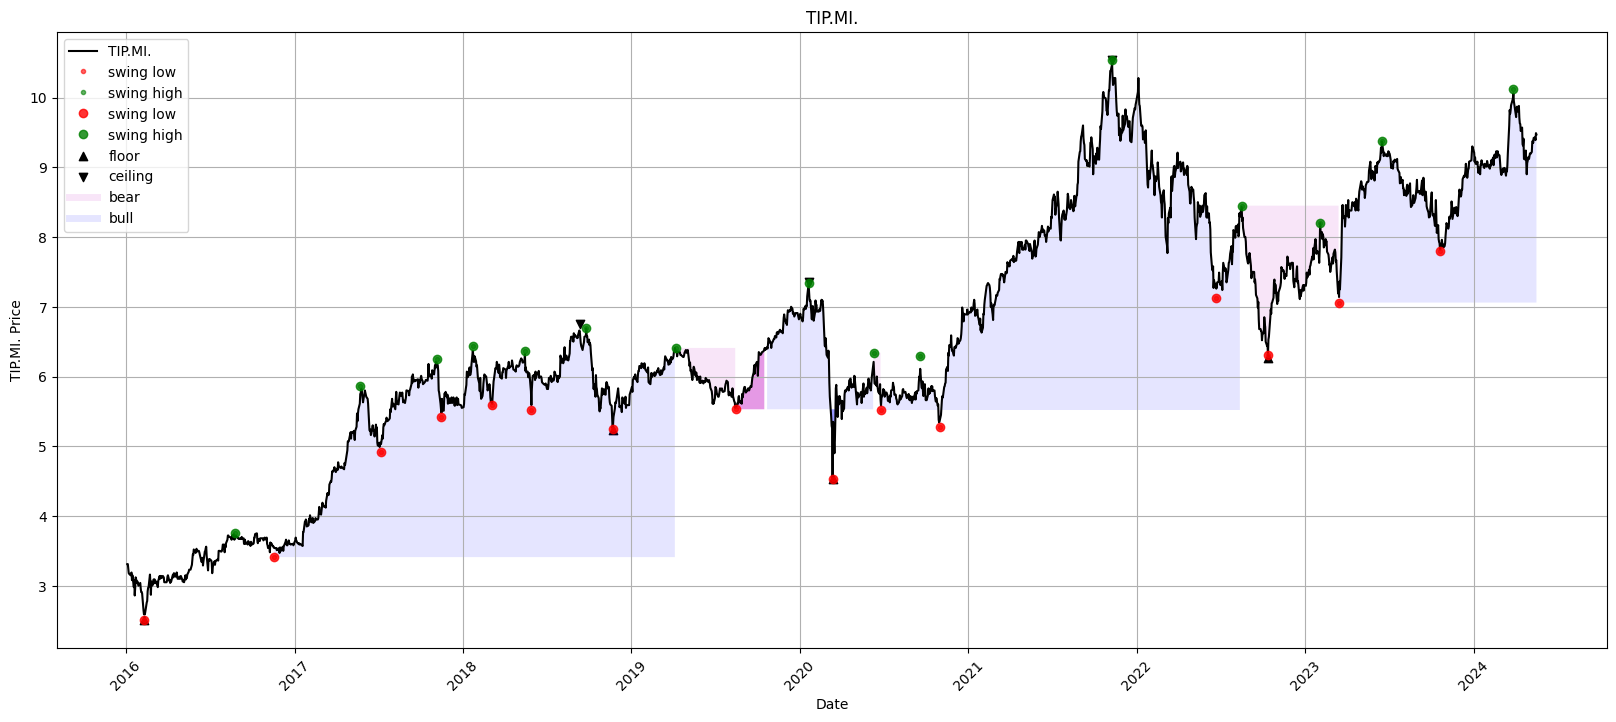

In [9]:
plot_regime_abs(df_fc, ticker)

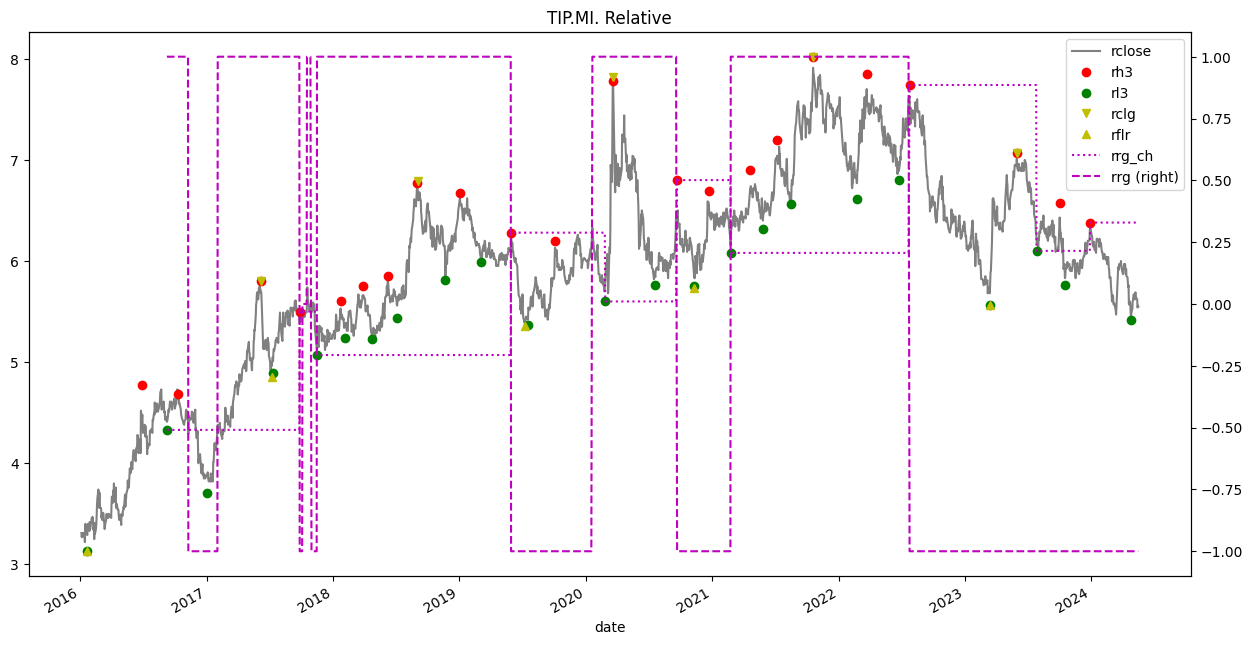

In [10]:
plot_signal_rel(df_fc, ticker)

1
1


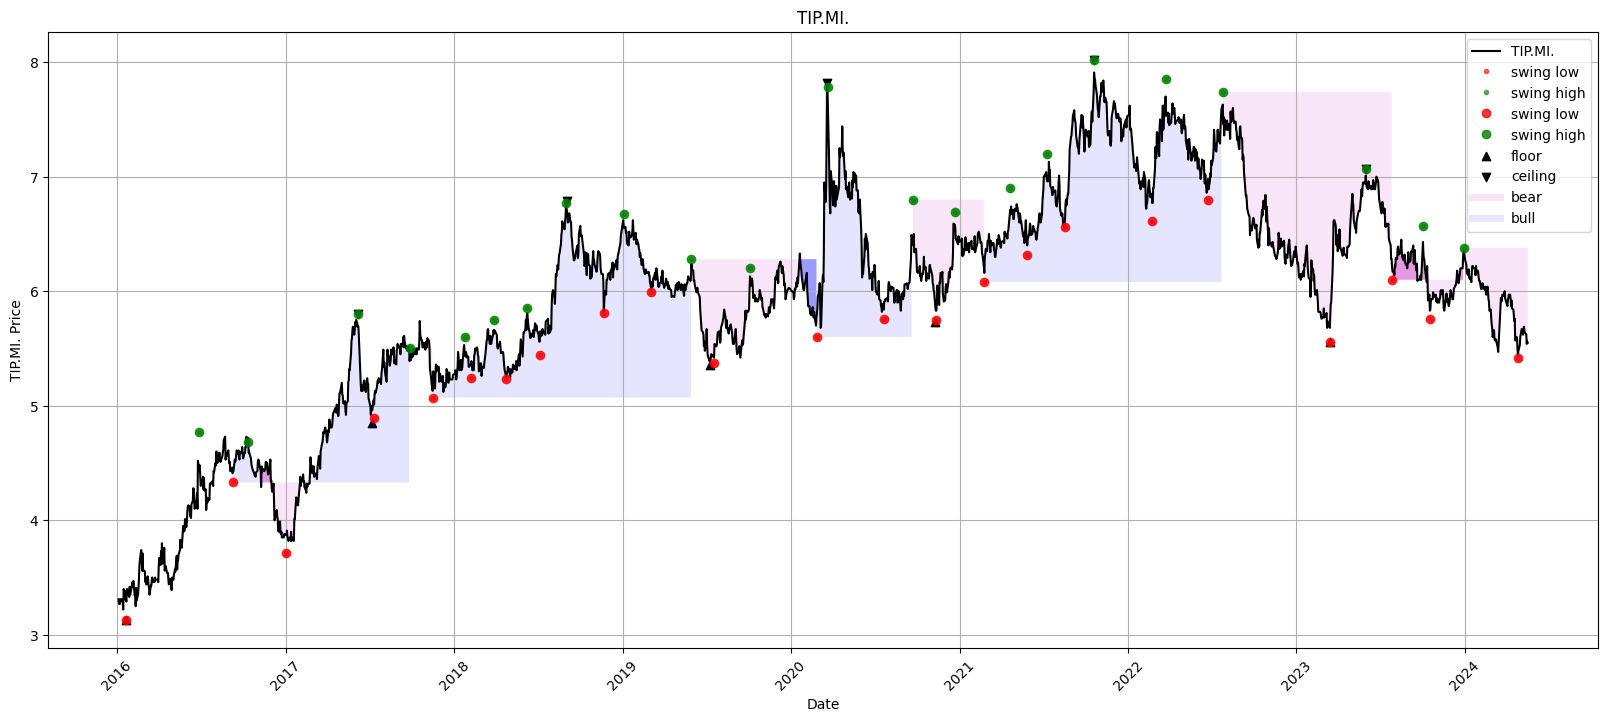

In [11]:
plot_regime_rel(df_fc, ticker)

In [12]:
method = ['breakout', 'turtle', 'sma', 'ema', 'floor_ceiling', 'floor_ceiling_relative']
signal = [bo_signal, tt_signal, sma_signal, ema_signal, fc_signal, fcr_signal]
df_signal = [df_bo, df_tt, df_ma, df_ma, df_fc, df_fc]

# method = ['turtle']
# signal = [tt_signal]
# df_signal = [df_tt]

In [13]:
def get_df_signal(df_signal, signal, window_exp):
    df_signal = df_signal.copy()
    df_signal = get_returns(df_signal, signal)
    df_signal = get_expectancies(df_signal, window_exp)
    return df_signal
    

In [14]:
window_exp = 100  # set the value of window_exp  
output_signals = []  # create an empty list to hold the output dataframes  
  
for i in range(len(signal)):  
    df = df_signal[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    output_df = get_df_signal(df, s, window_exp)  # call the function on the ith dataframe and signal  
    output_df['method'] = str(m)  # create a new column in output_df with the signal name  
    output_signals.append(output_df)  # append the output dataframe to the list  
  
# output_signals now contains the processed dataframes with the signal column added  


In [15]:
output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'close', 'stop_loss','tt_cumul']]
output_df_sel.groupby('method').last() 

close  stop_loss  tt_cumul
method                                            
breakout                 9.47        8.9  0.843283
ema                      9.47        8.9  0.833033
floor_ceiling            9.47        8.9  3.237304
floor_ceiling_relative   9.47        9.5 -0.217694
sma                      9.47        8.9 -0.258515
turtle                   9.47        9.2  0.273875

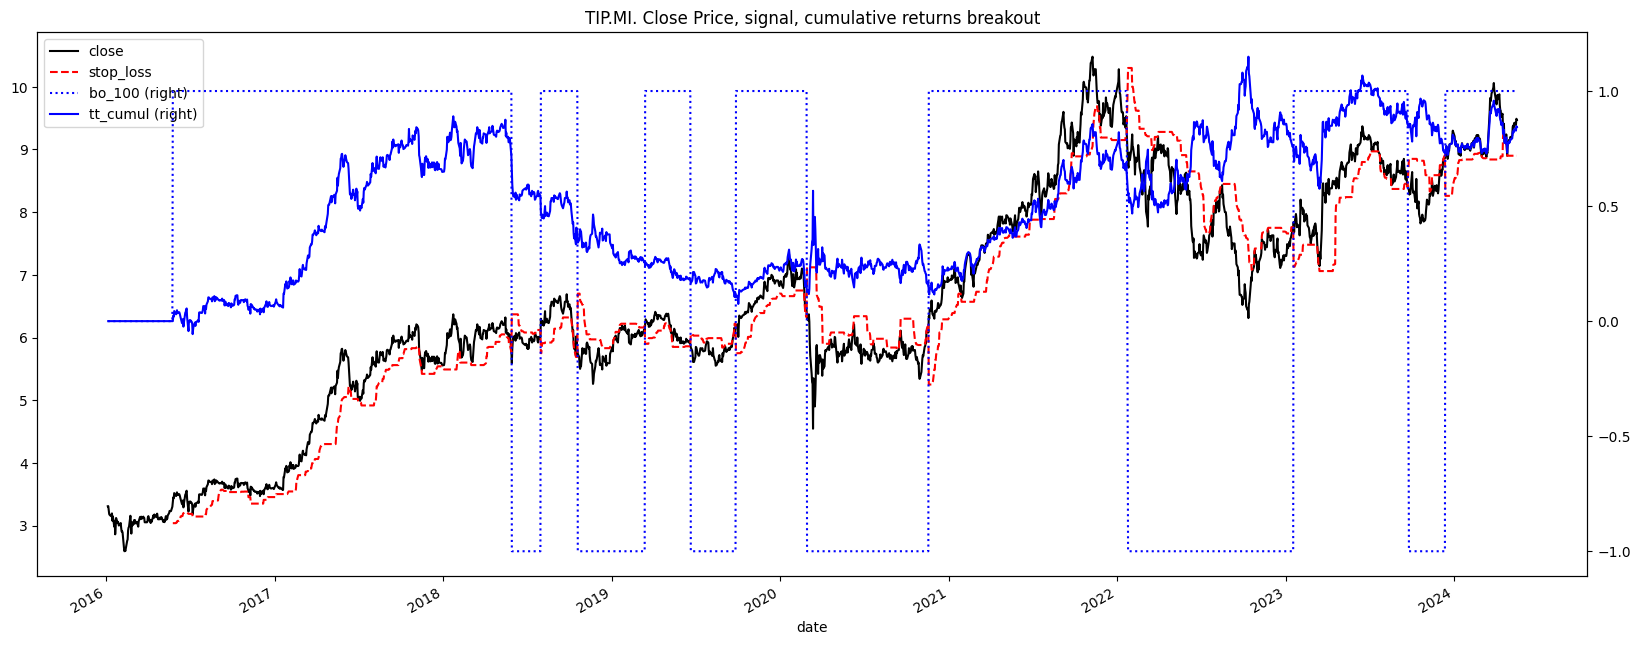

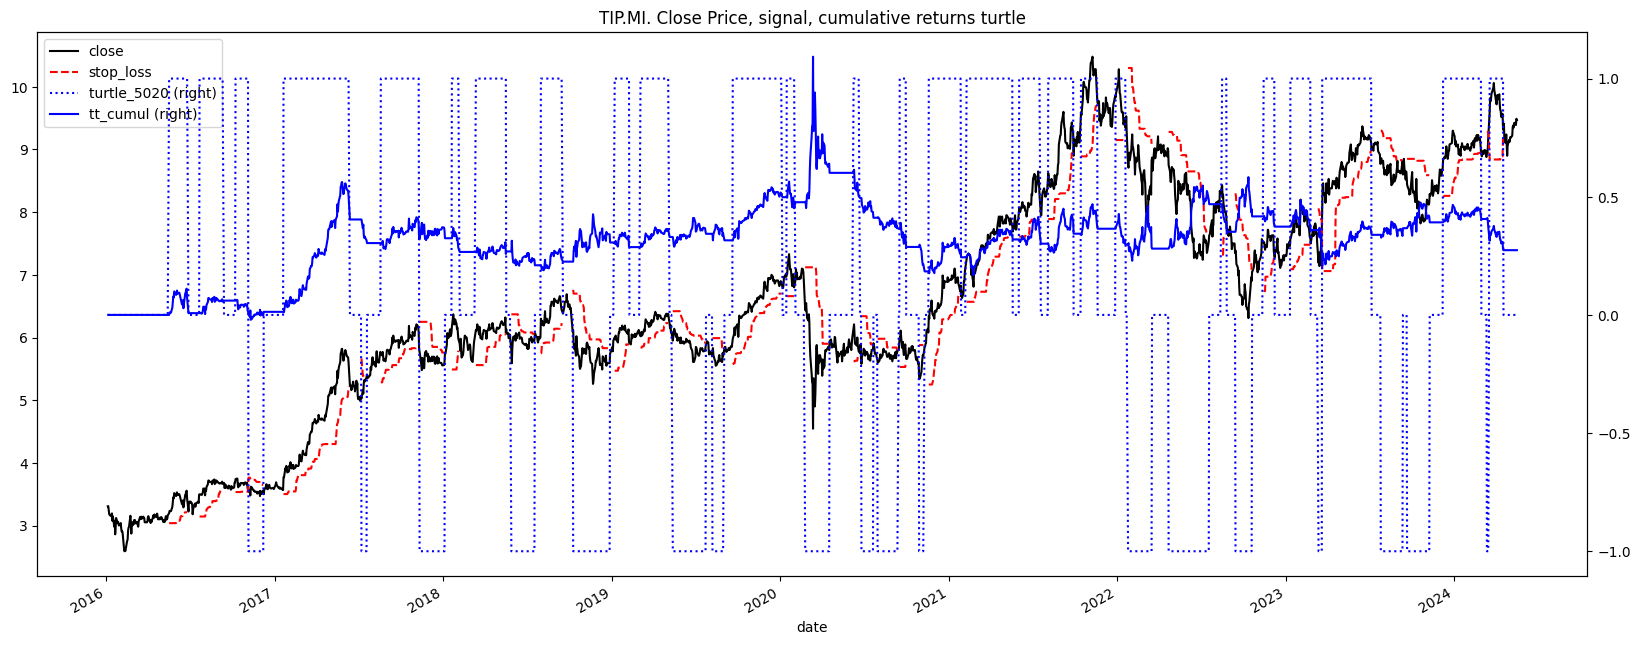

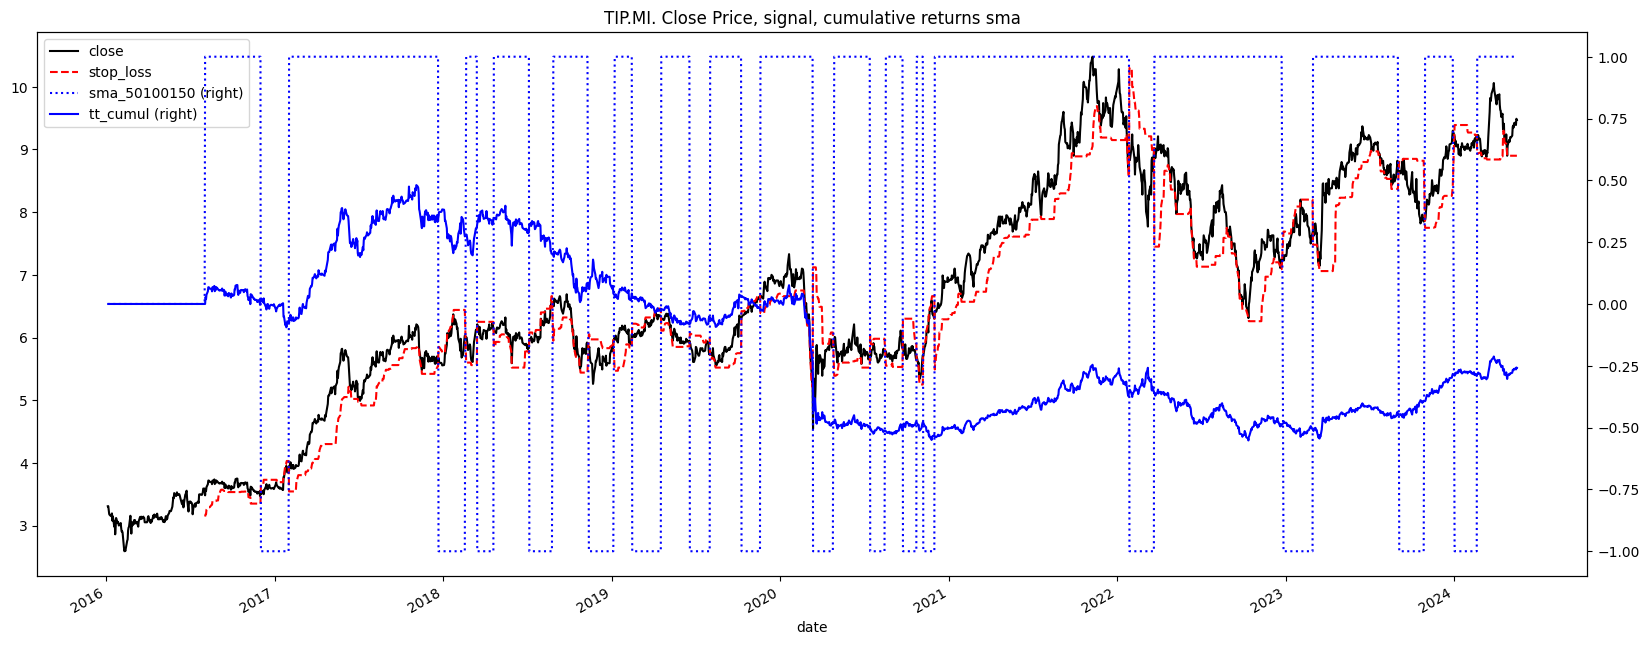

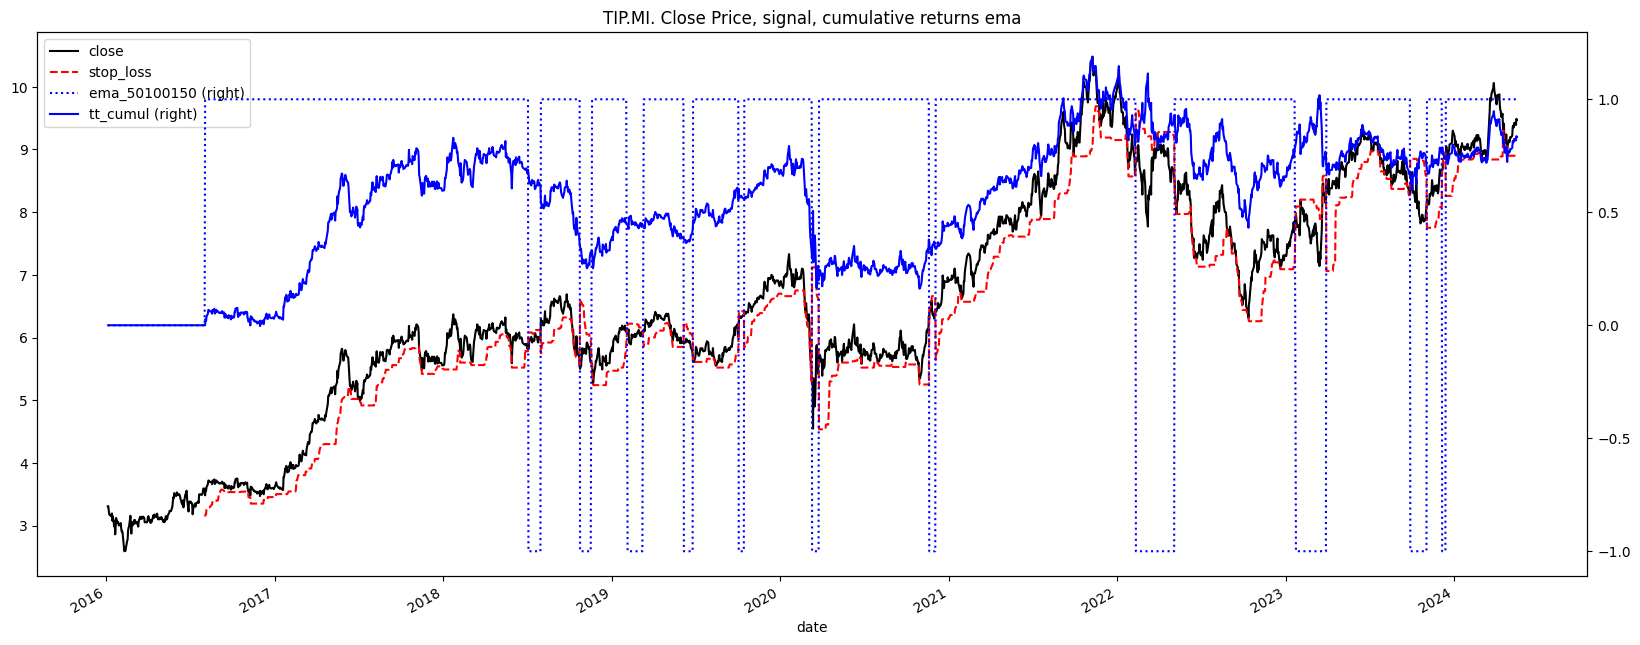

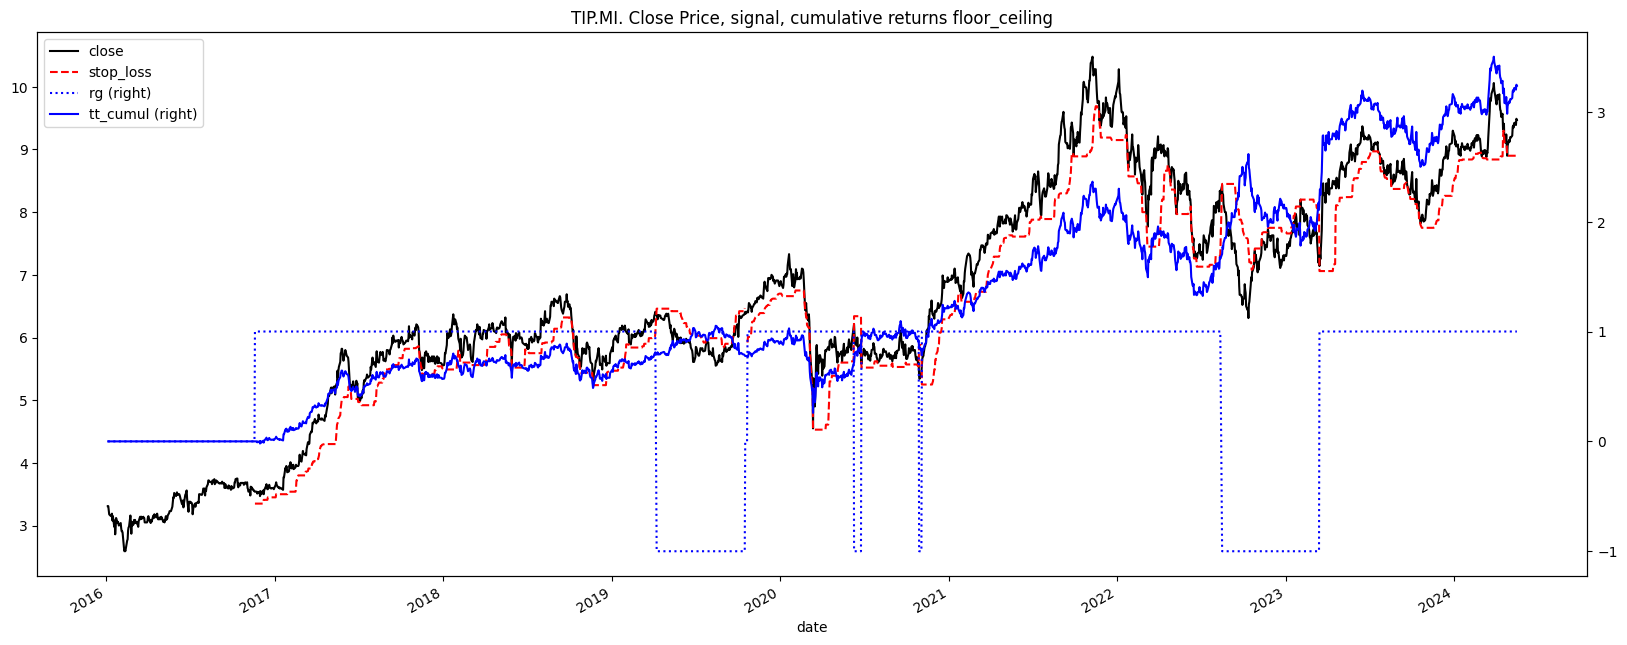

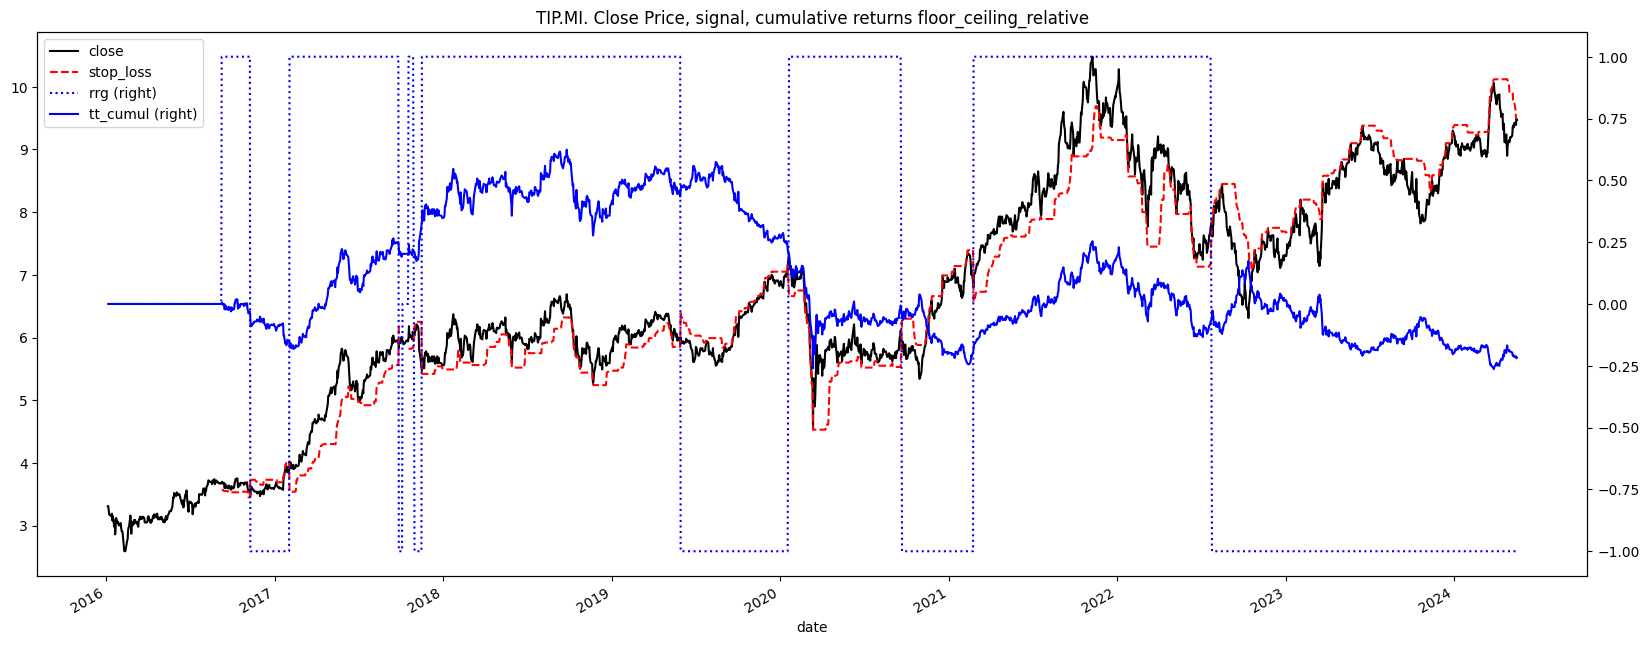

In [16]:
for i in range(len(signal)):  
    # print(i)
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    plot_price_signal_cumreturns(df, ticker, s, m)

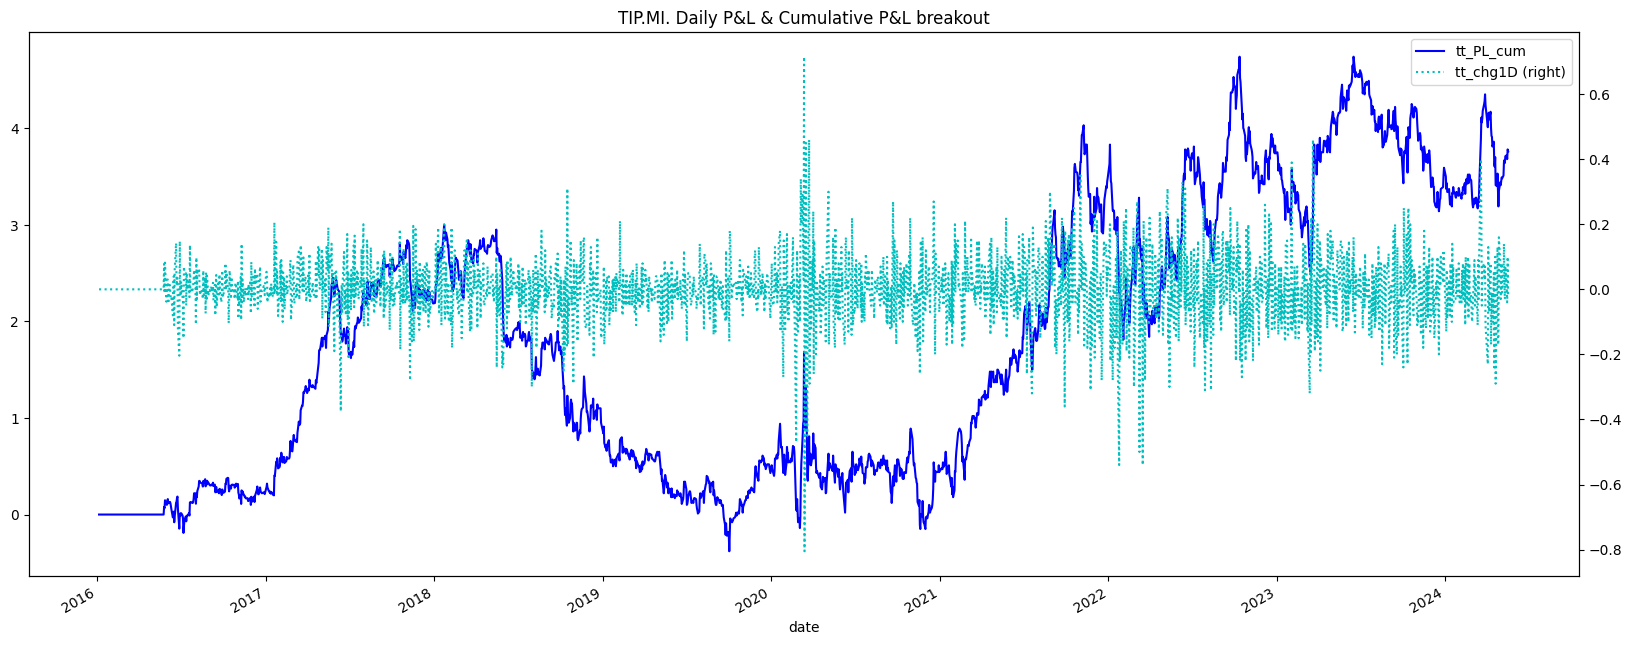

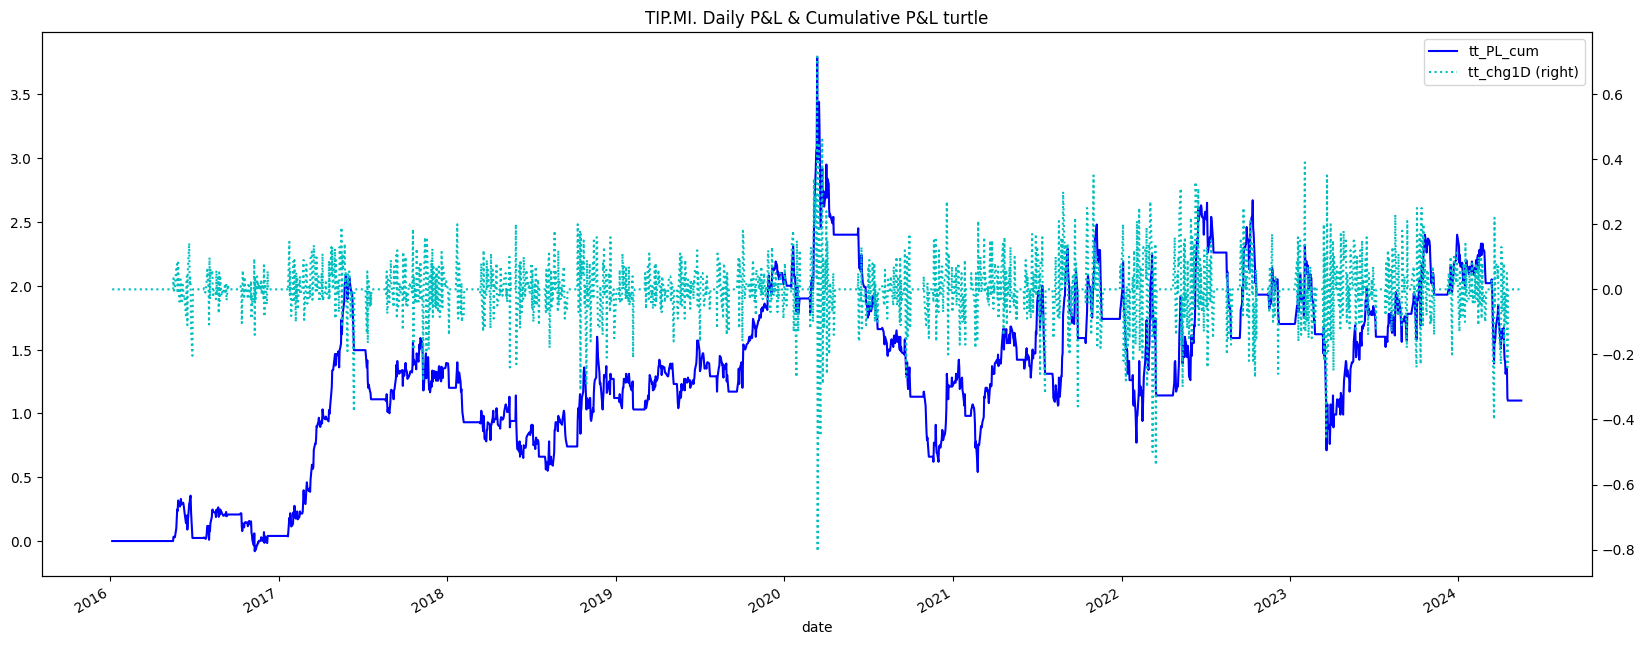

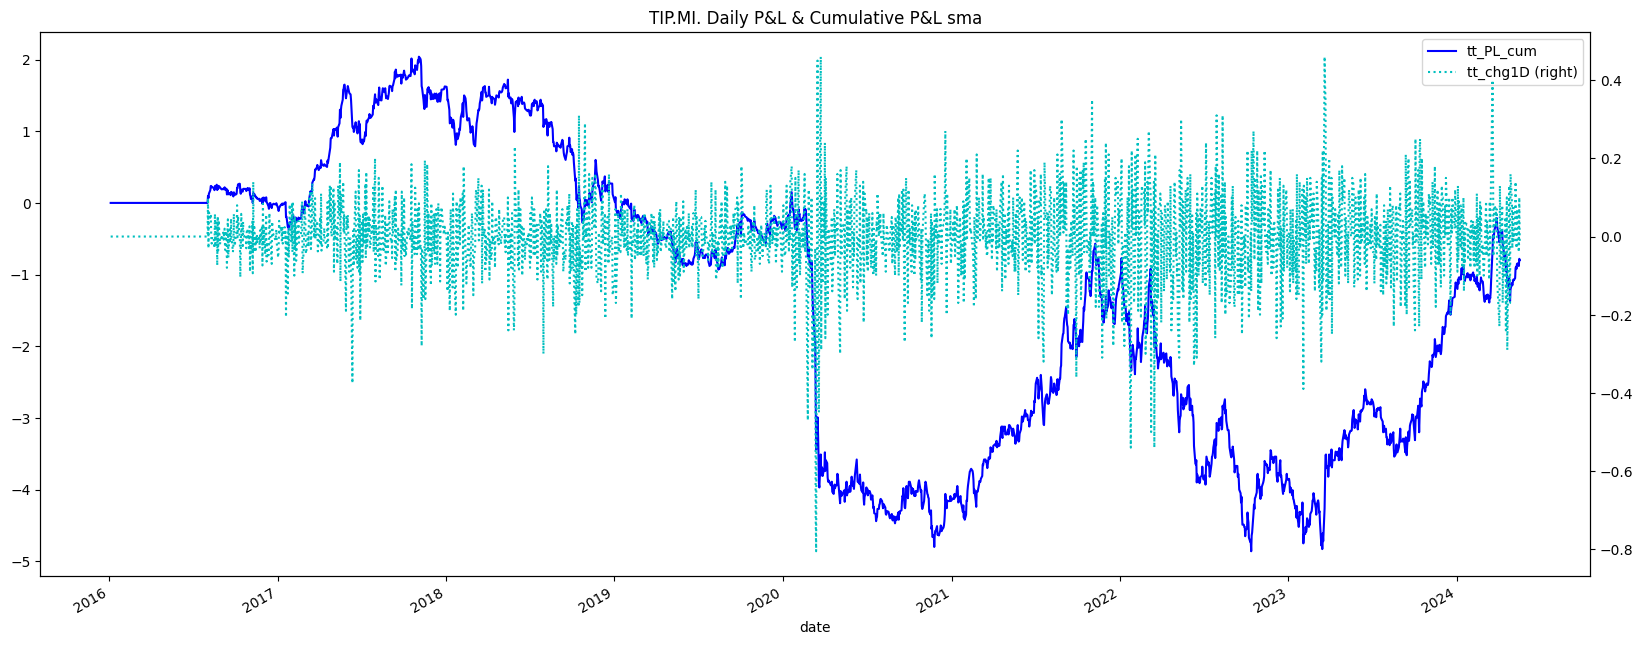

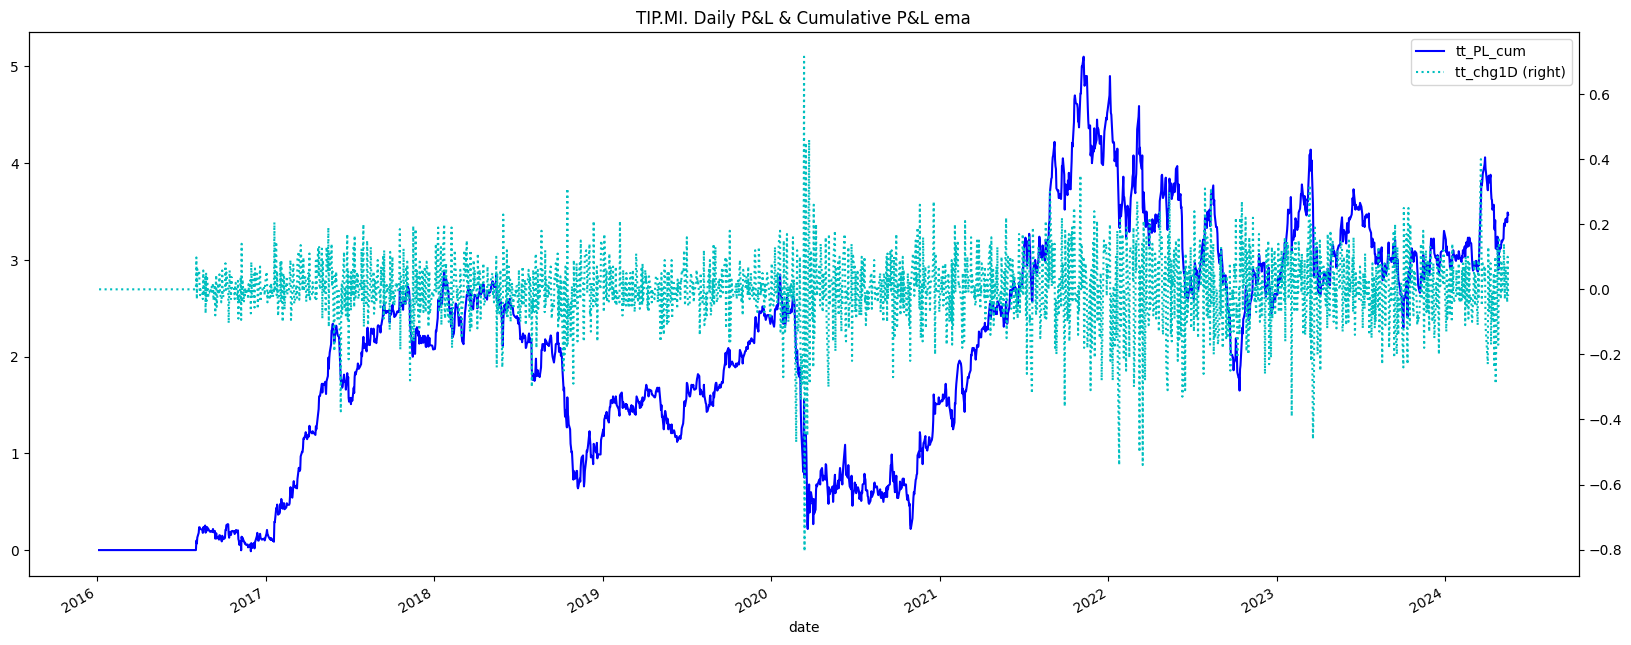

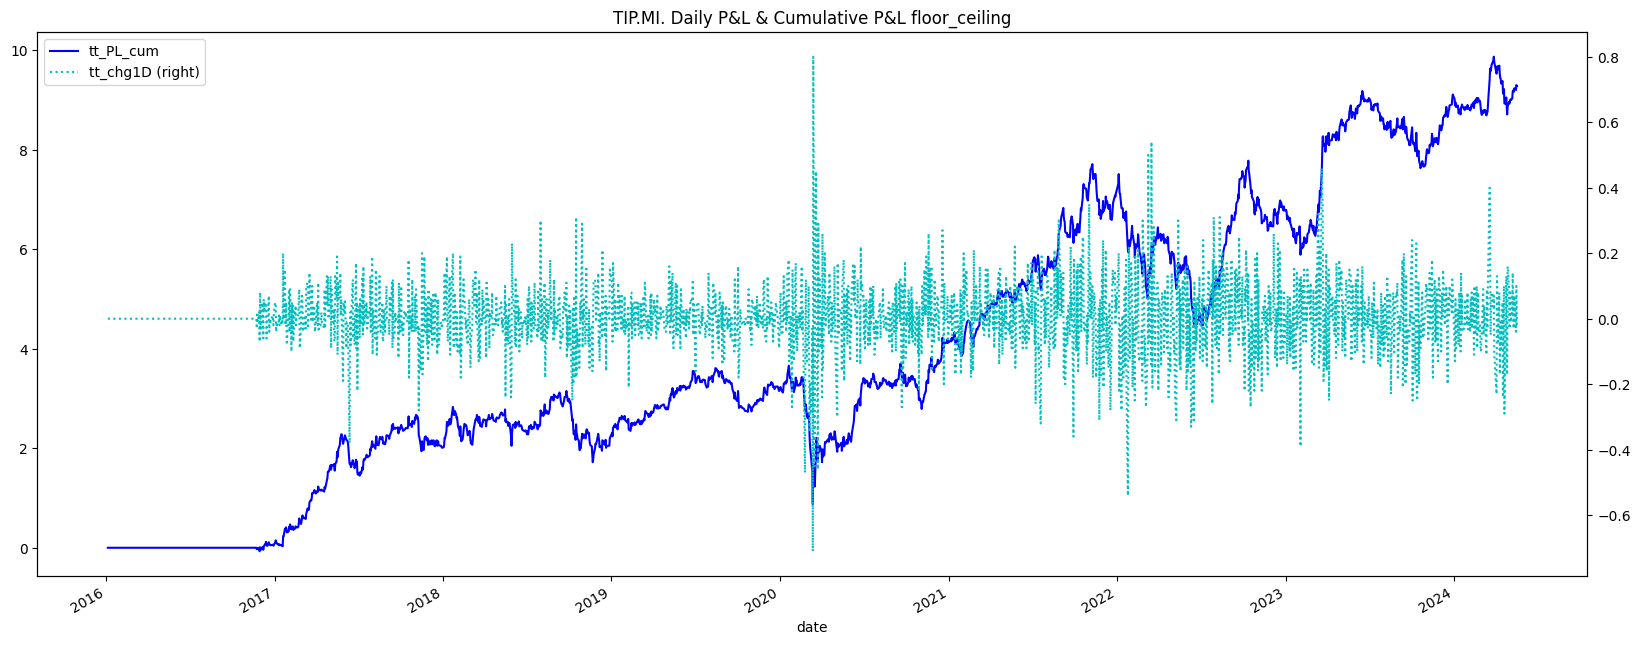

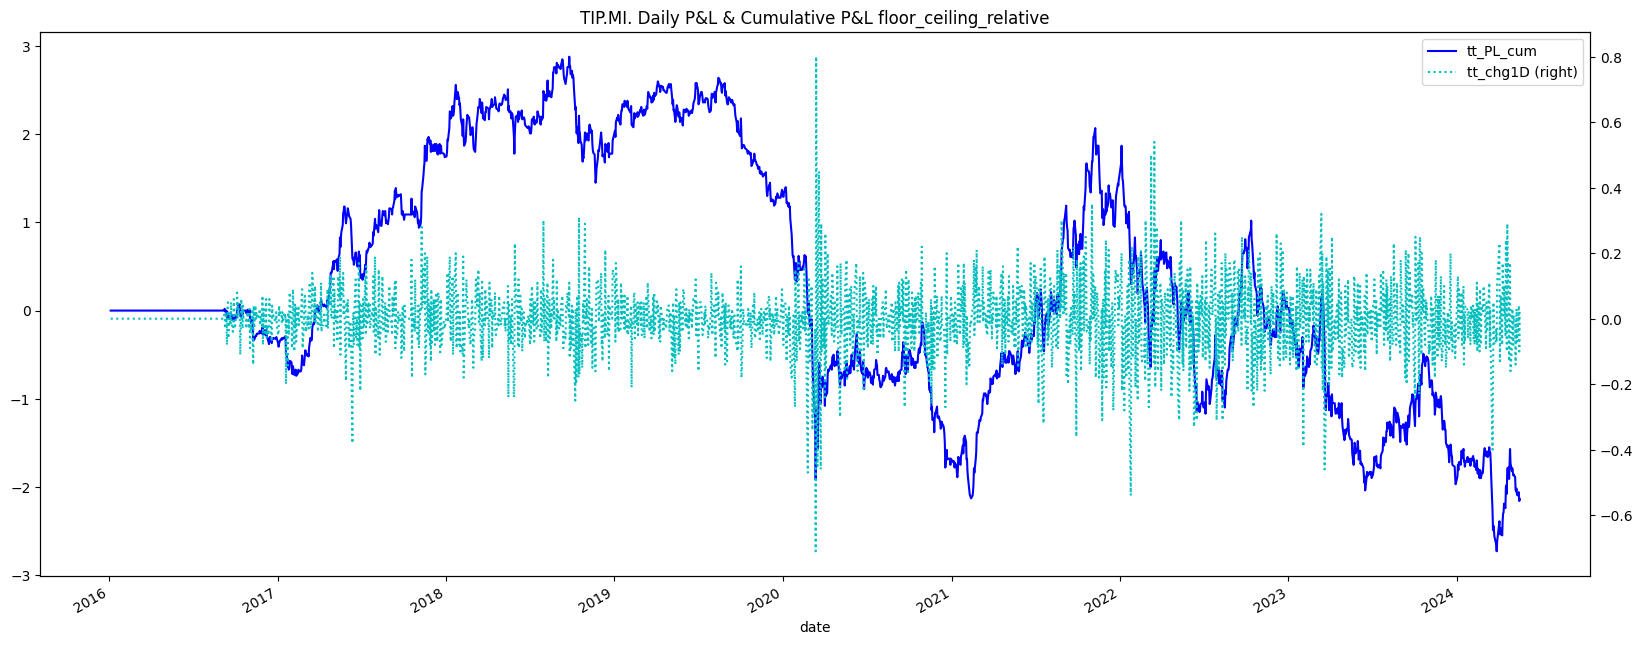

In [17]:
for i in range(len(signal)):  
    # print(i)
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    plot_PL(df, ticker, m)

In [18]:
output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'trading_edge','geometric_expectancy','kelly']]
output_df_sel.groupby('method').last() 

trading_edge  geometric_expectancy      kelly
method                                                               
breakout                    0.000353              0.000344  21.425326
ema                         0.000353              0.000344  21.425326
floor_ceiling               0.000353              0.000344  21.425313
floor_ceiling_relative     -0.000109             -0.000117  -6.600490
sma                         0.000998              0.000990  60.828051
turtle                      0.000118              0.000114  14.433564

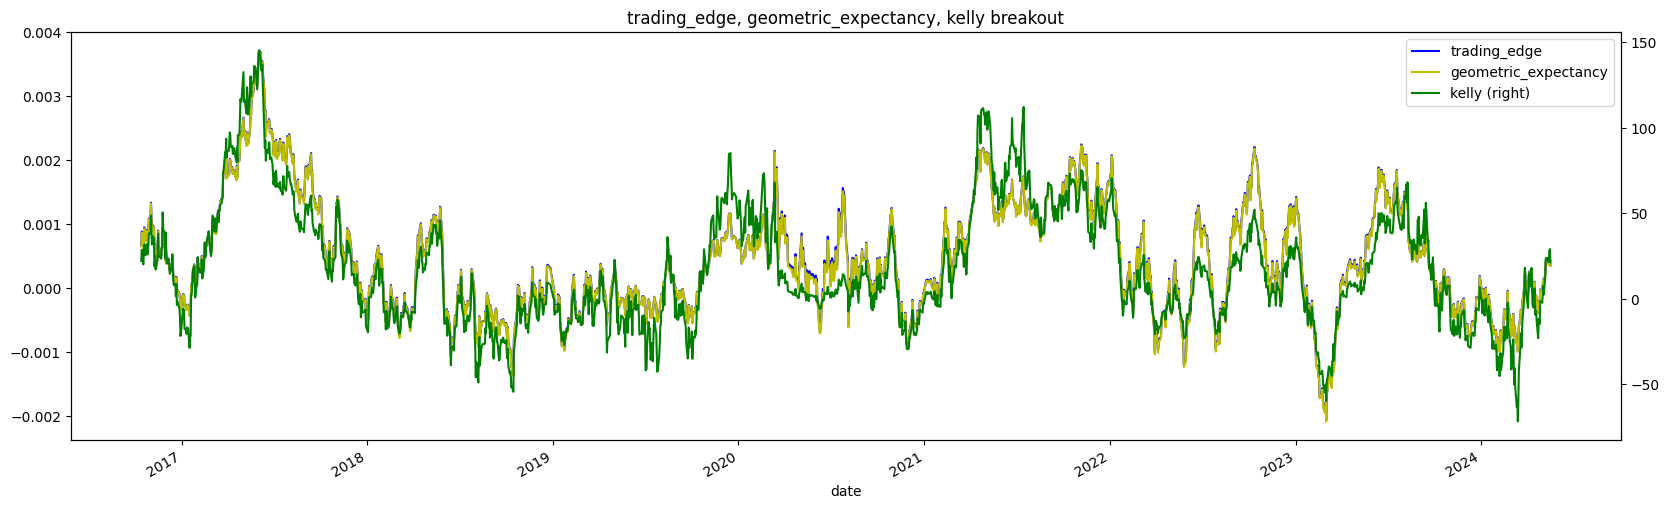

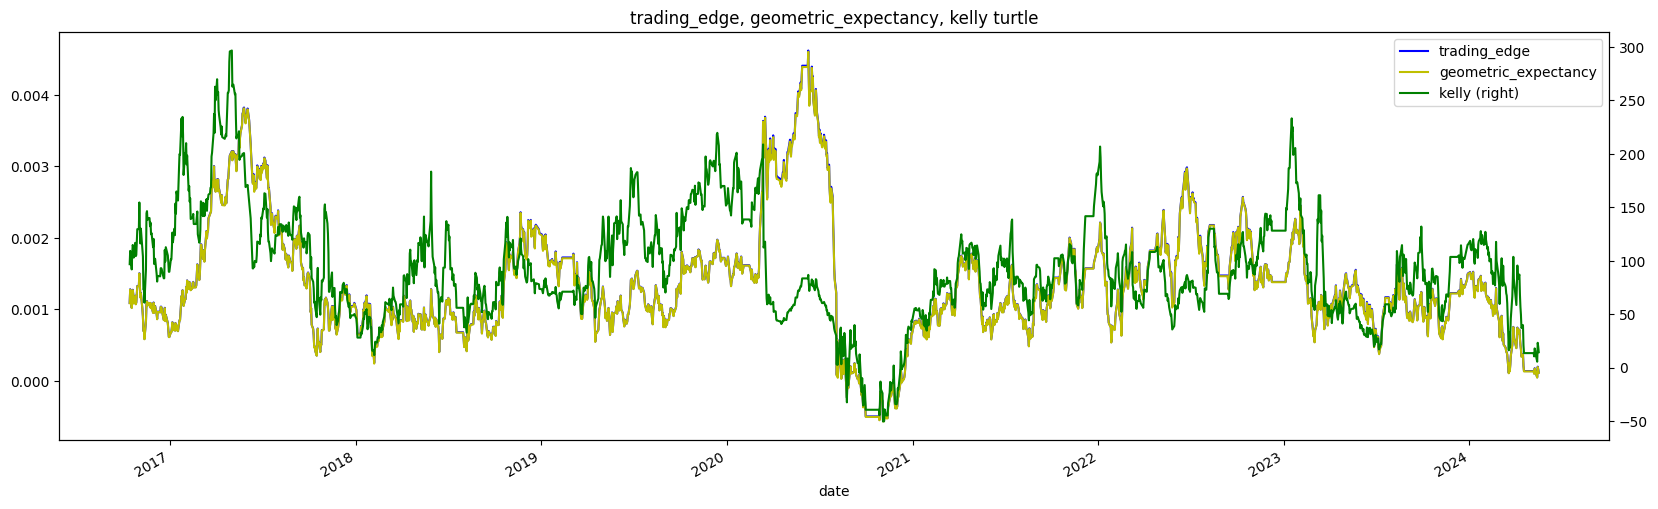

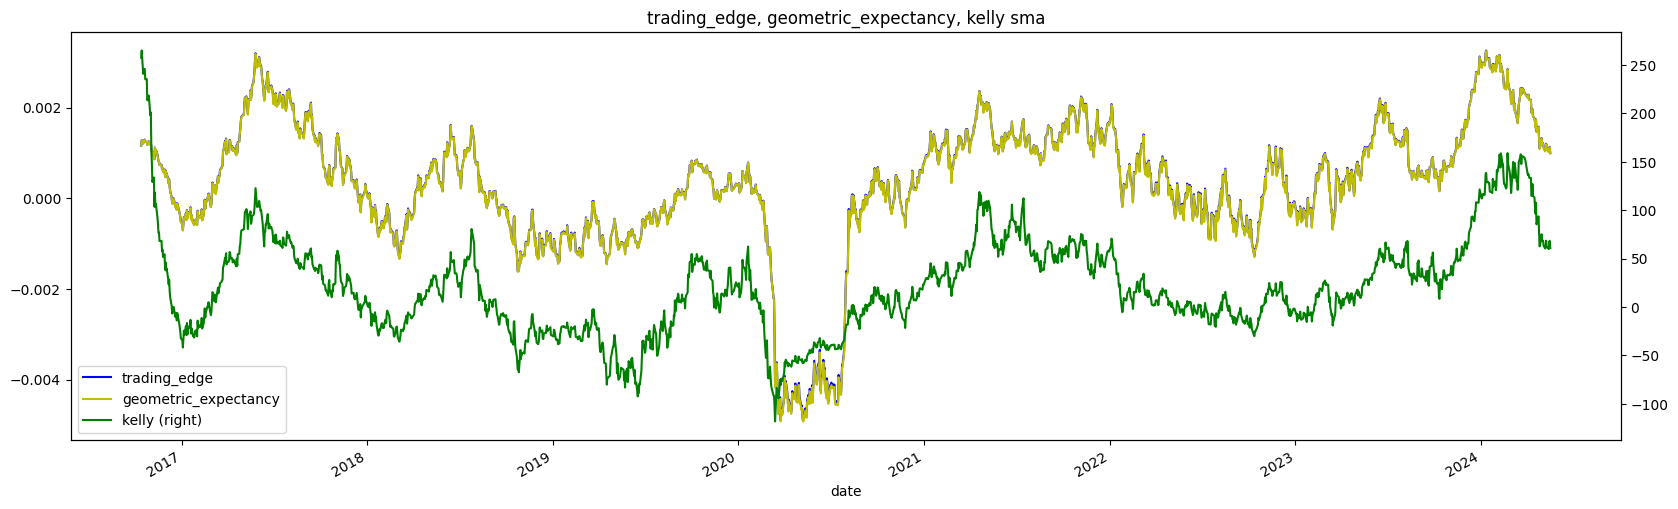

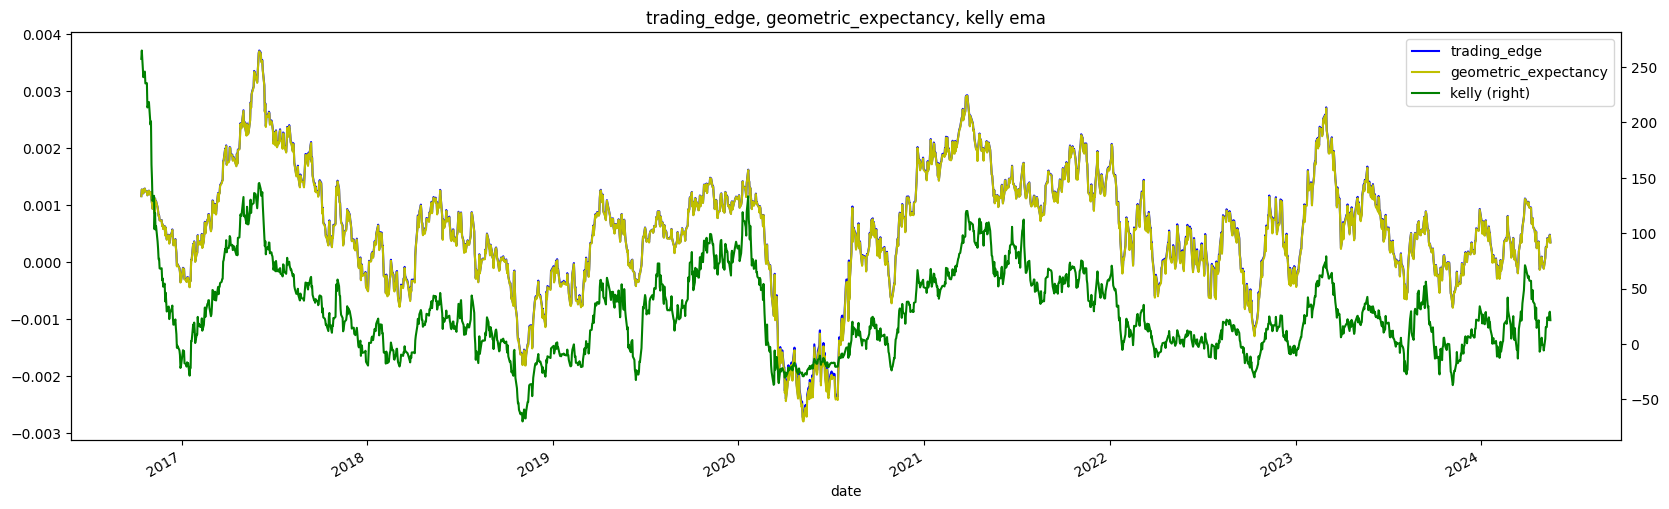

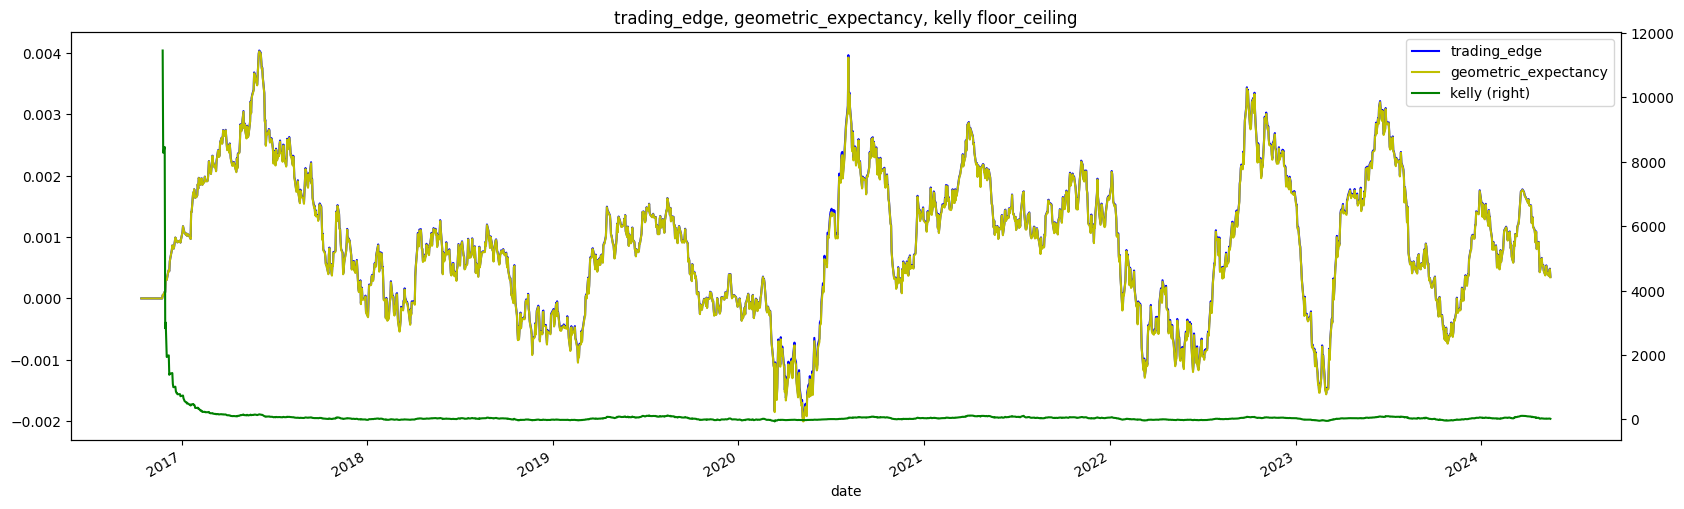

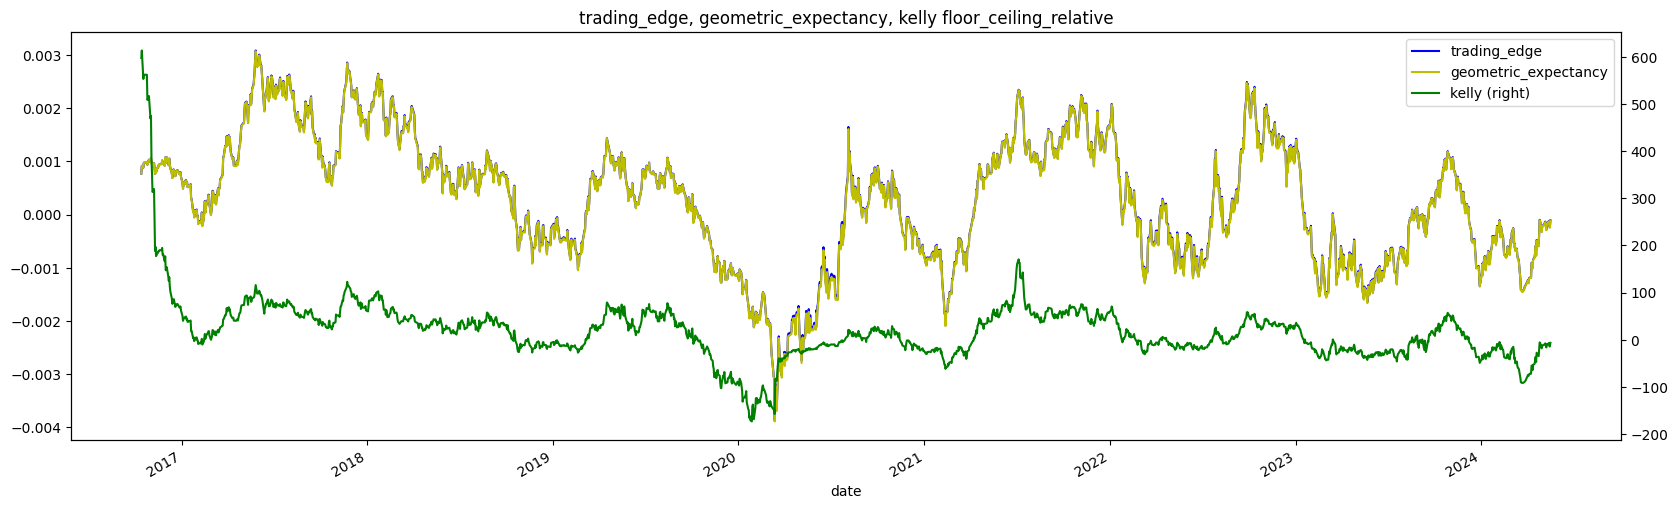

In [19]:
for i in range(len(signal)):  
    # print(i)
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    plot_expectancies(df, window_exp, m)

In [20]:
starting_capital = 100000
lot = 100
mn = -0.0025
mx = -0.0075
# avg = (mn + mx) / 2
tolerance= -0.1
equal_weight = 0.05
span= 5
fx = 1

In [21]:

for i in range(len(signal)):  
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    output_df = get_equity_risk(df, tolerance, mn, mx, span)  # call the function on the ith dataframe and signal  
    output_signals.append(output_df)  # append the output dataframe to the list  


In [22]:

for i in range(len(signal)):  
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    output_df = get_shares(df, starting_capital, lot, mn, mx, tolerance, equal_weight, span, fx, s)
    output_signals.append(output_df)  # append the output dataframe to the list  


In [23]:
output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'constant','concave','convex','equal_weight', 'tt_PL_cum_fx']]
output_df_sel.groupby('method').last() 

constant        concave         convex  \
method                                                                
breakout                105639.998913  108271.998405  108271.998405   
ema                     104855.200911  107629.601431  107629.601431   
floor_ceiling           113680.000000  120520.000000  116602.000000   
floor_ceiling_relative   95538.000000   93846.000000   97722.000000   
sma                      98879.996729   98239.994860   98239.994860   
turtle                  103928.701639  105454.002357  103837.401319   

                         equal_weight  tt_PL_cum_fx  
method                                               
breakout                105263.998985      3.759999  
ema                     104855.200911      3.468001  
floor_ceiling           109074.000000      9.280000  
floor_ceiling_relative   98833.000000     -2.140000  
sma                      98879.996729     -0.800002  
turtle                  101347.999024      1.100998

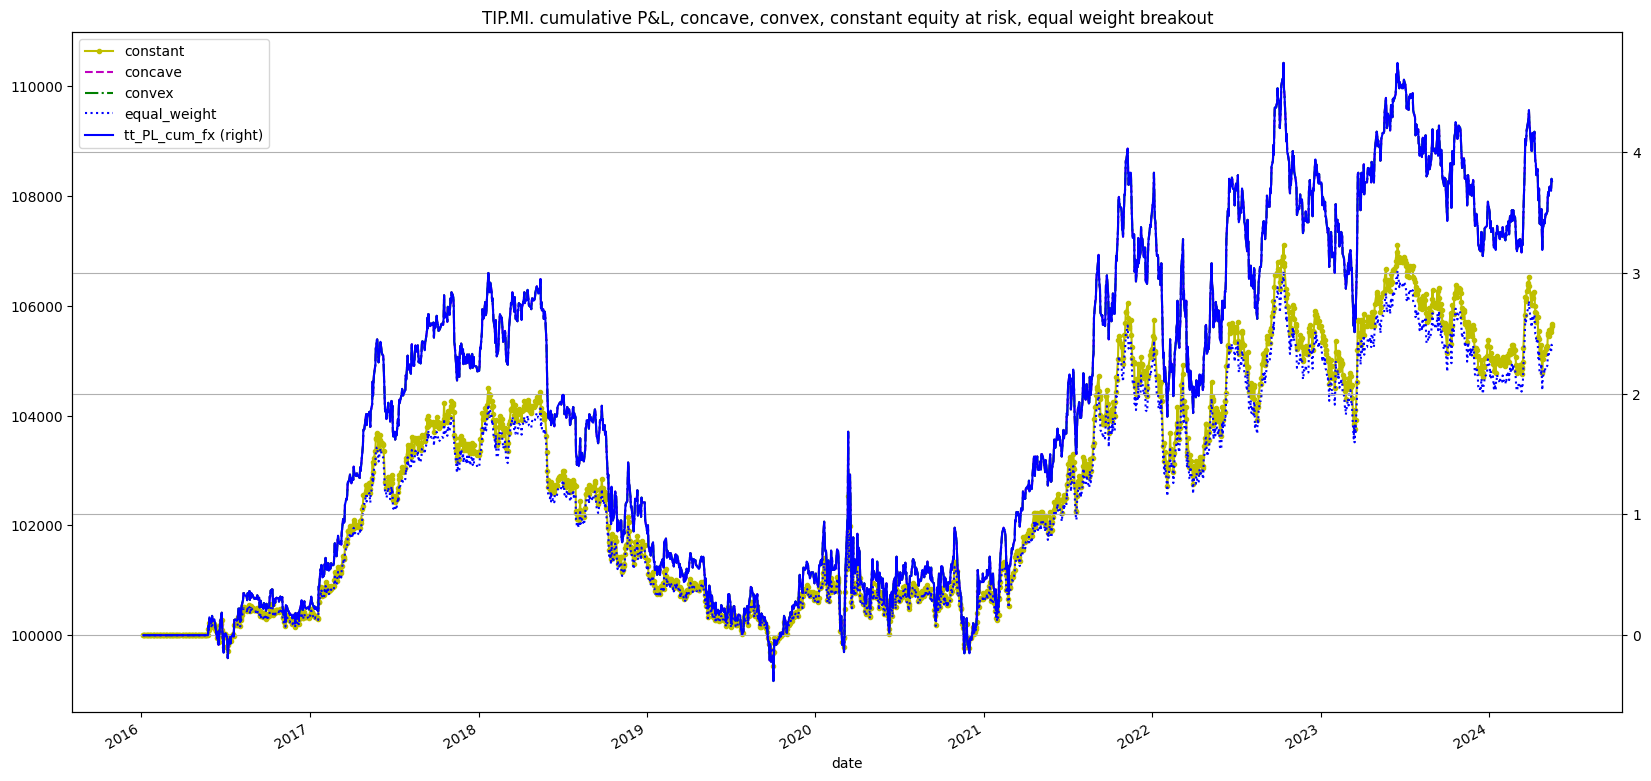

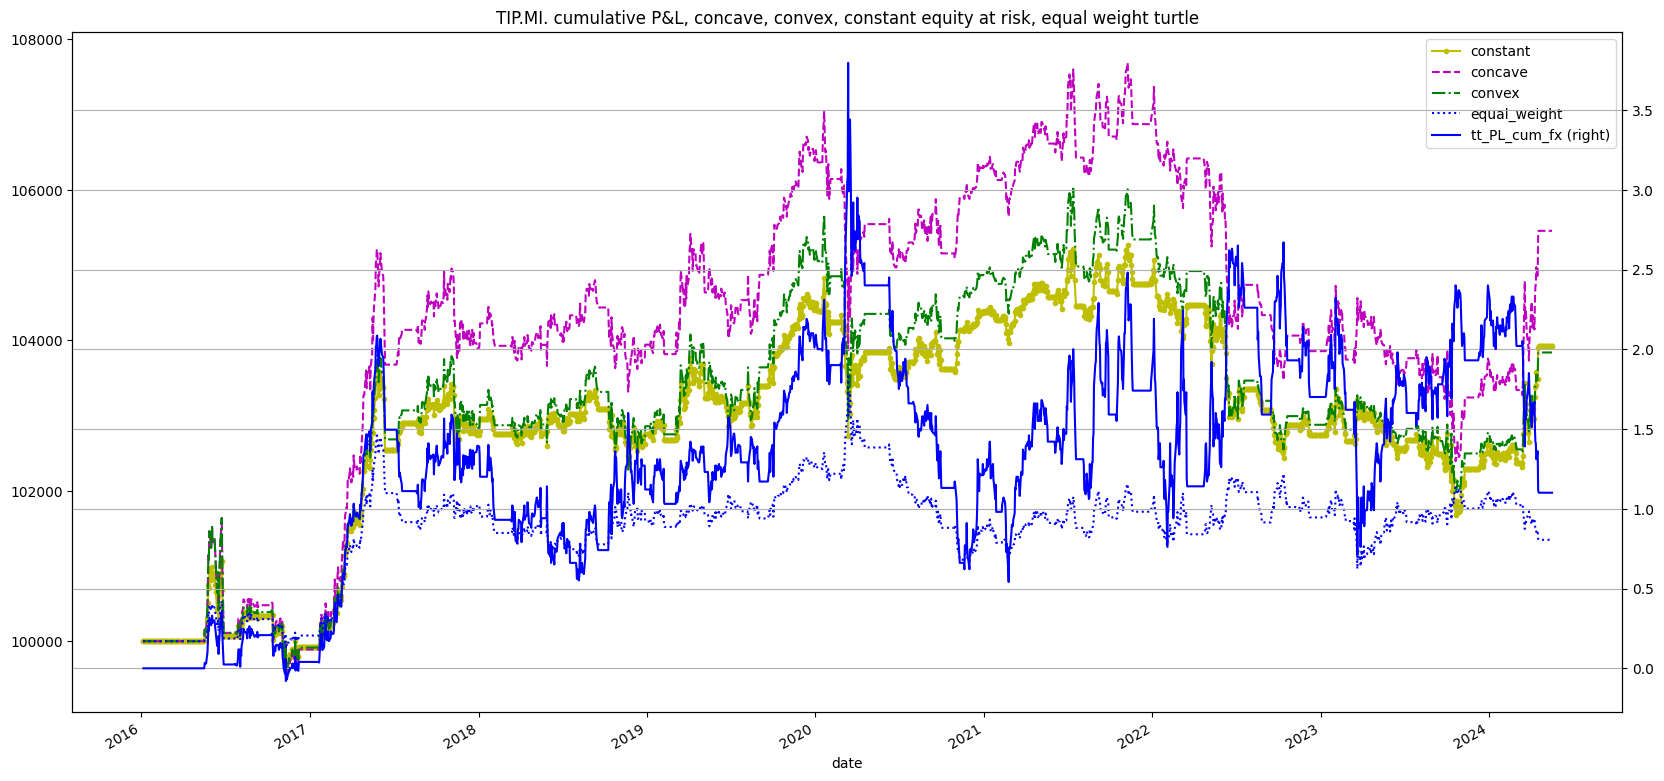

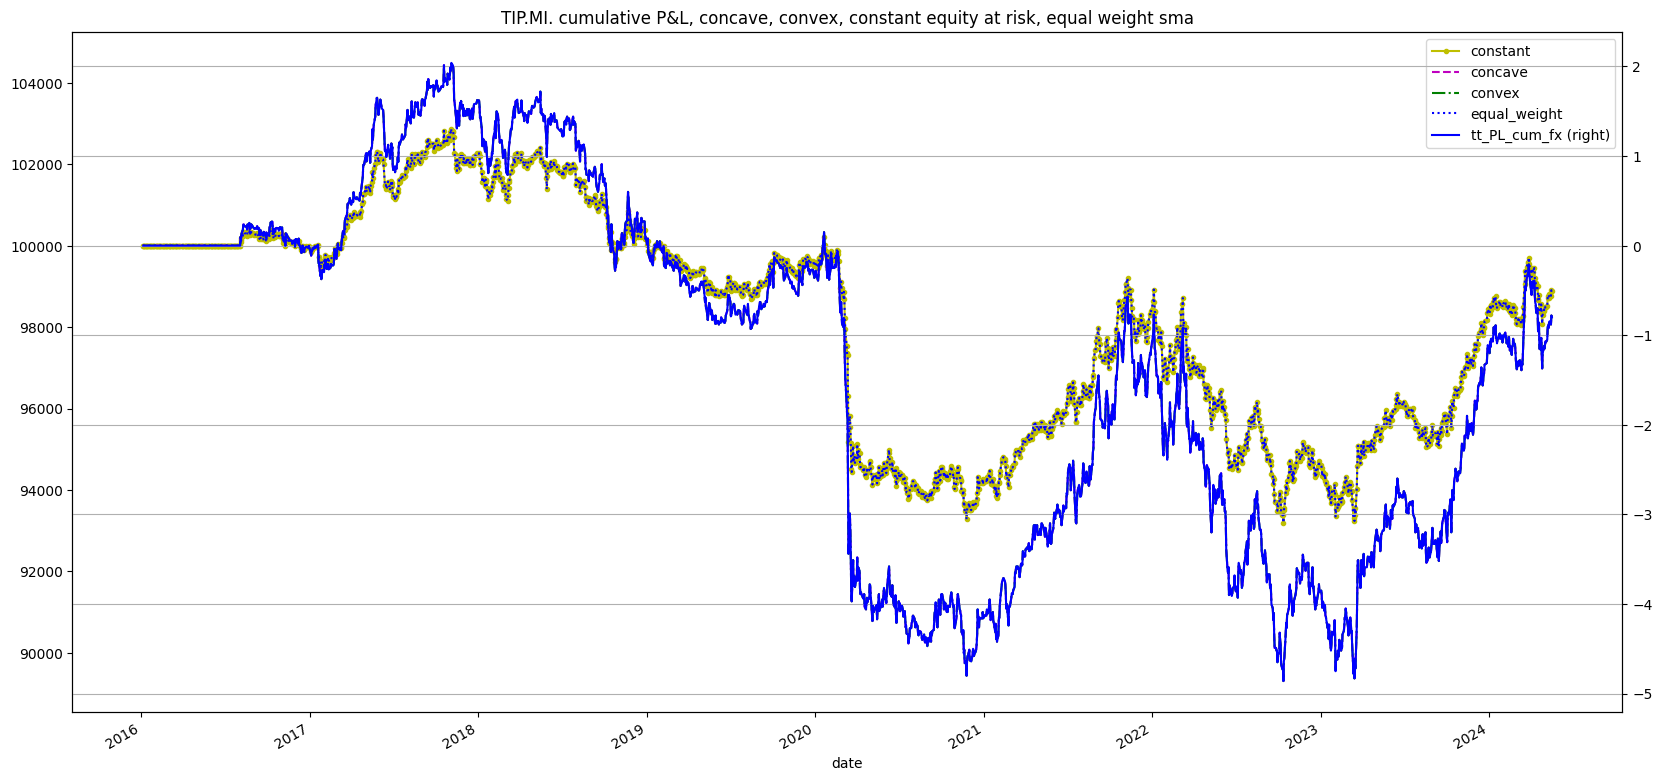

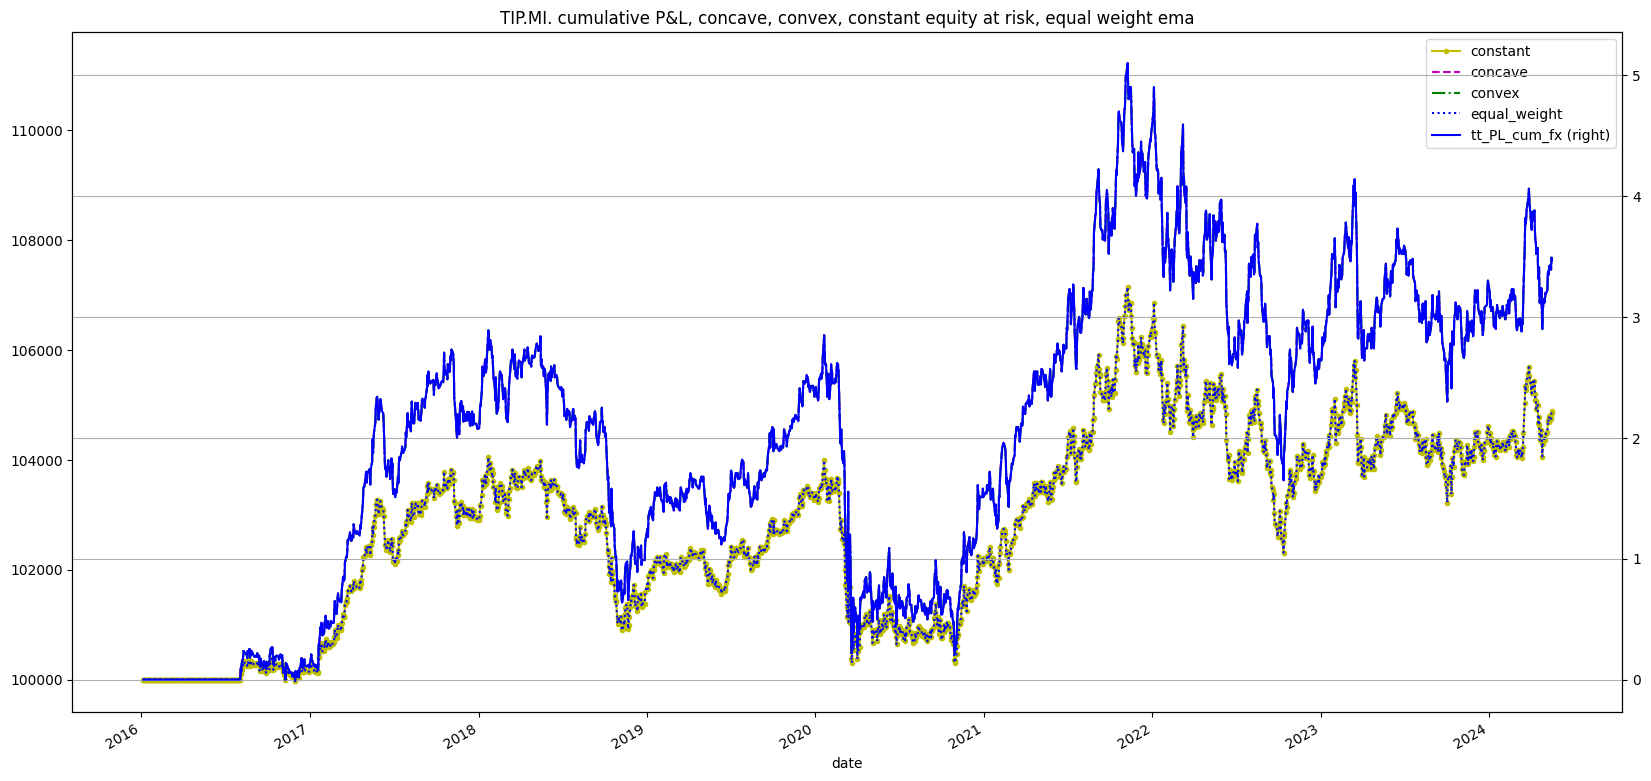

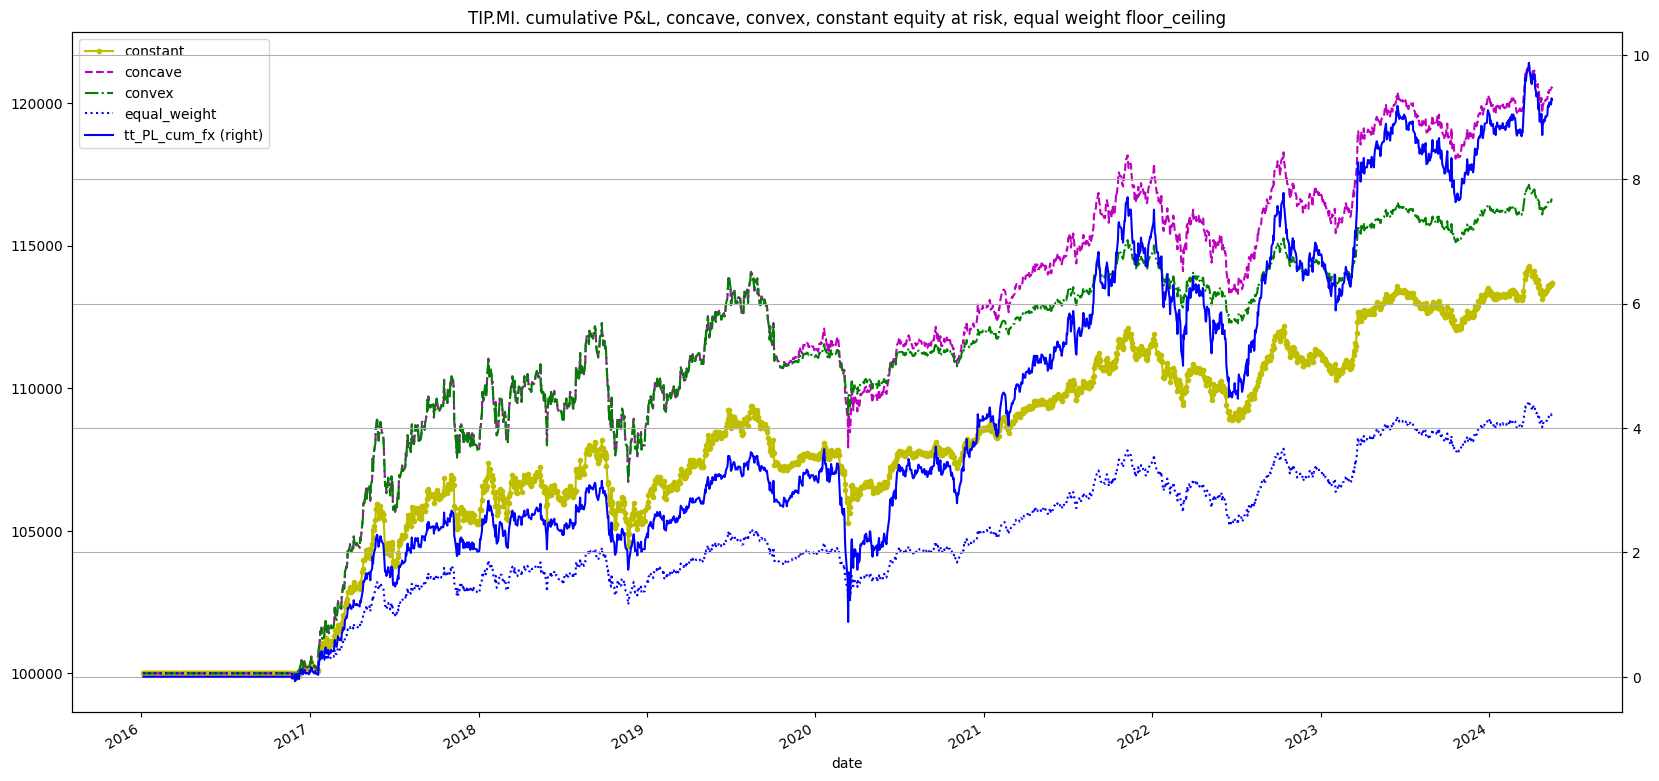

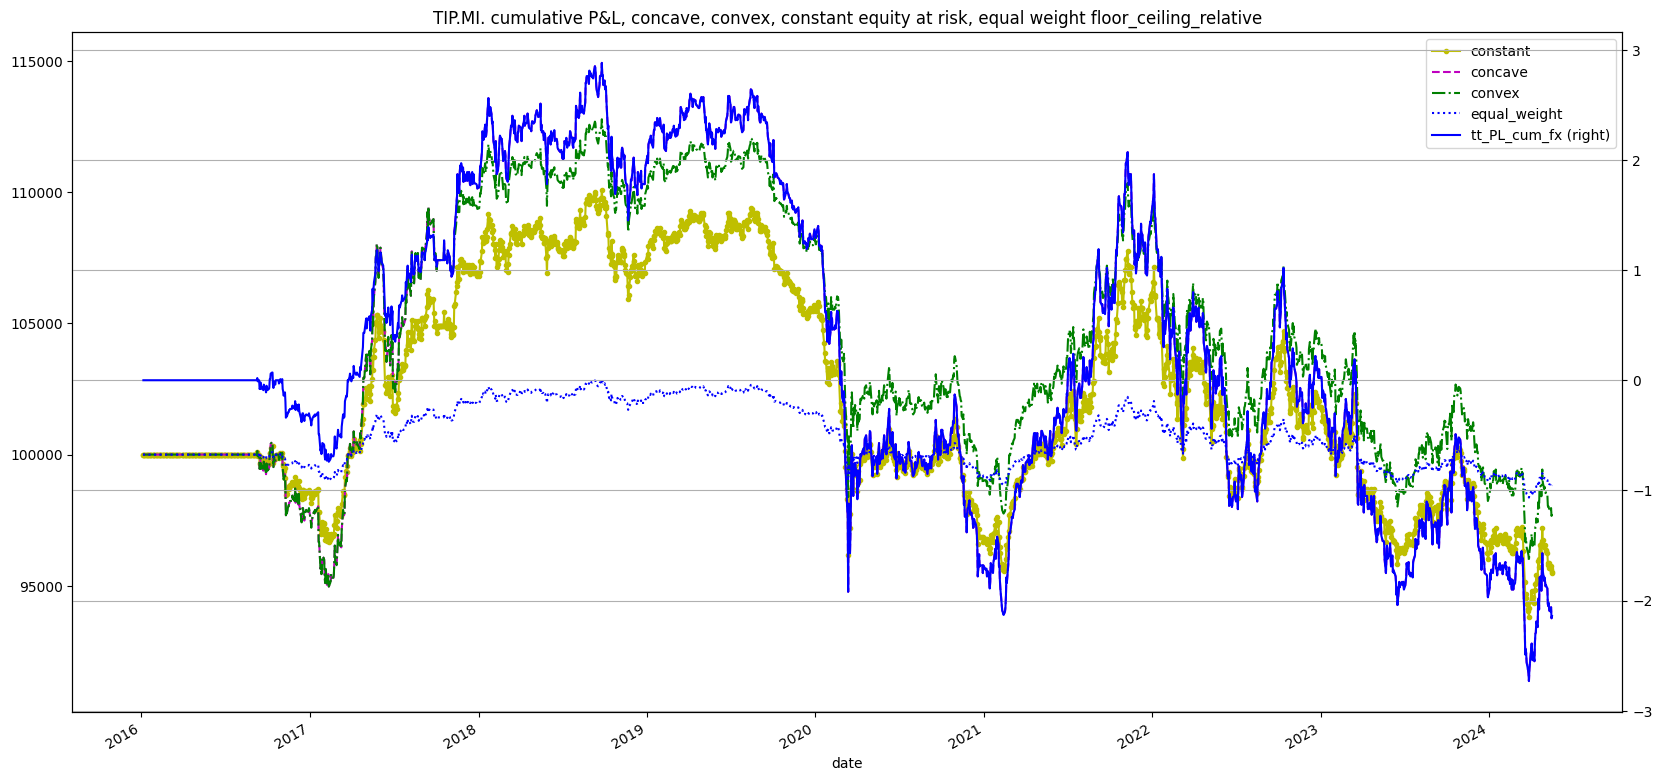

In [24]:
for i in range(len(signal)):  
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    # print(df.tail())
    plot_equity_amount(df, ticker, m)

In [25]:
# # determining the name of the file
# file_name = 'A2A_unt.xlsx'
 
# # saving the excel
# df.to_excel(file_name)

output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'shs_eql','shs_fxd','shs_ccv','shs_cvx']]
output_df_sel.groupby('method').last() 

shs_eql  shs_fxd  shs_ccv  shs_cvx
method                                                    
breakout                 -500.0   1500.0   2200.0   2200.0
ema                      -500.0   1400.0   2200.0   2200.0
floor_ceiling            -500.0   1000.0   1500.0    900.0
floor_ceiling_relative   -500.0   2900.0   4200.0   3000.0
sma                      -500.0   1400.0   2200.0   2200.0
turtle                   -500.0  -1700.0  -2300.0  -1400.0

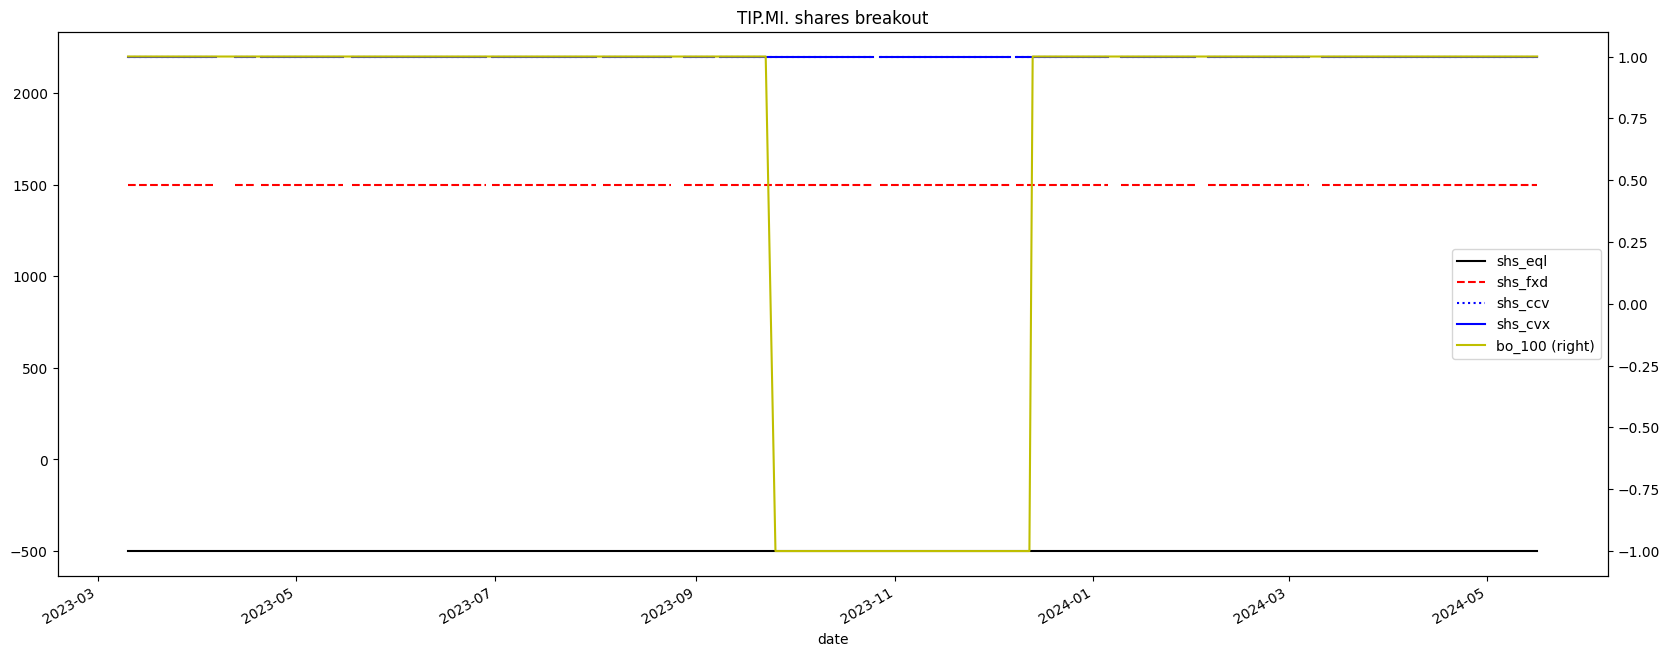

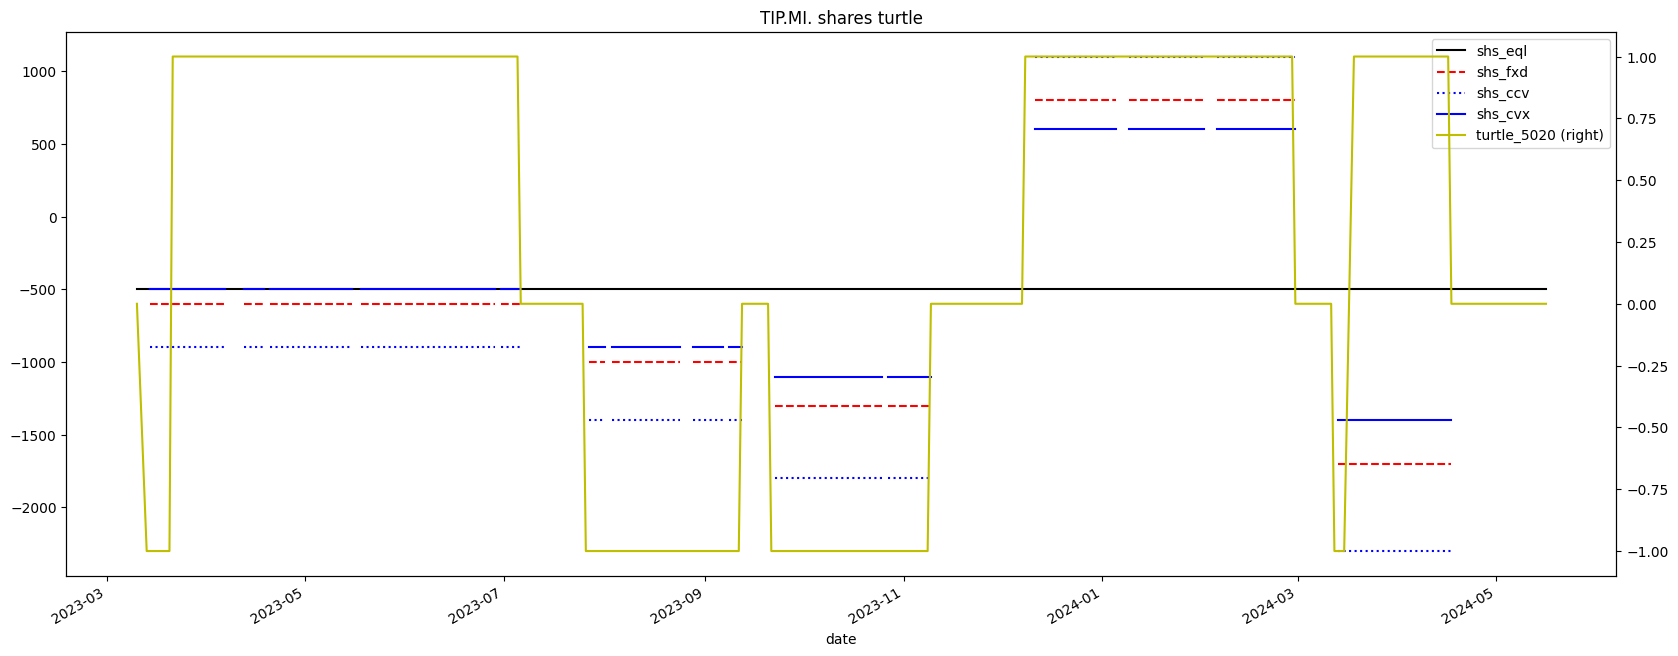

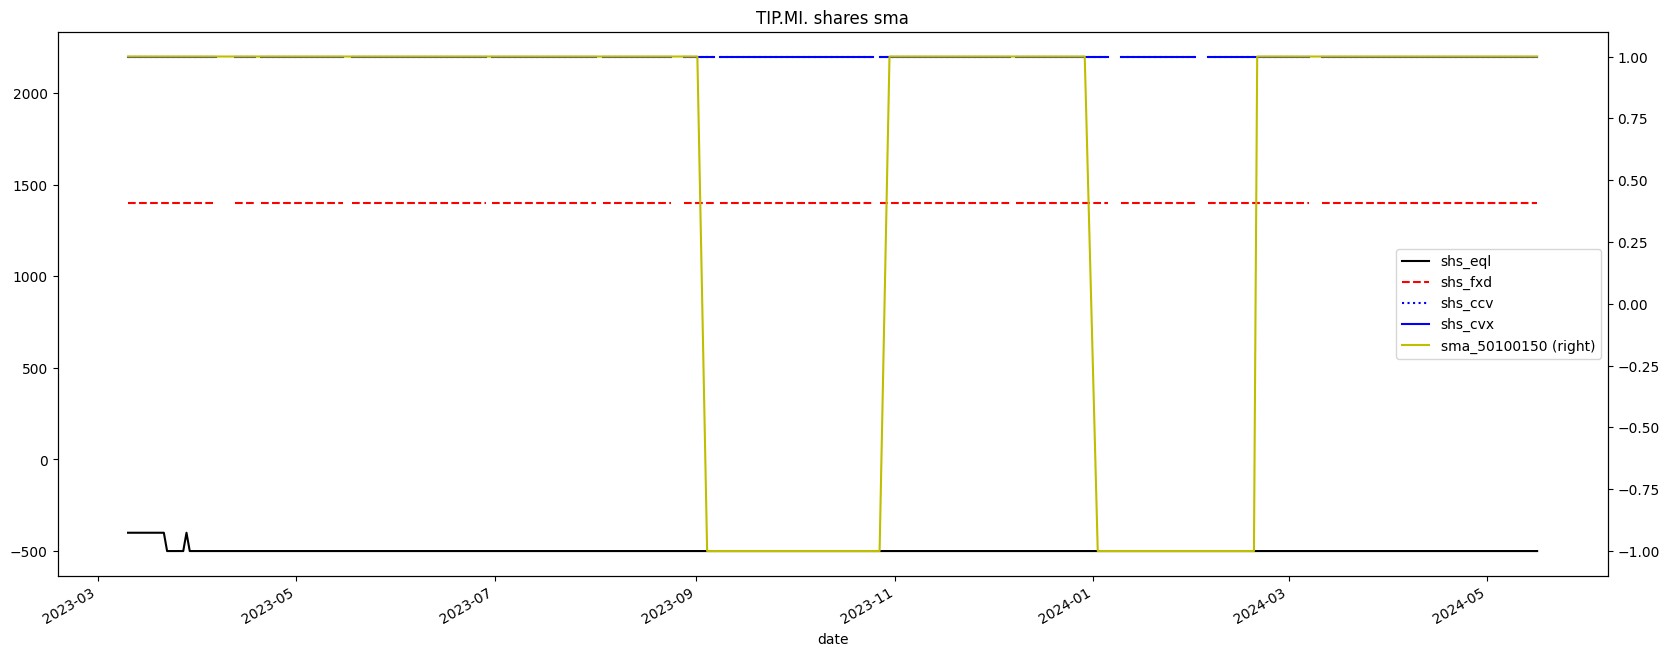

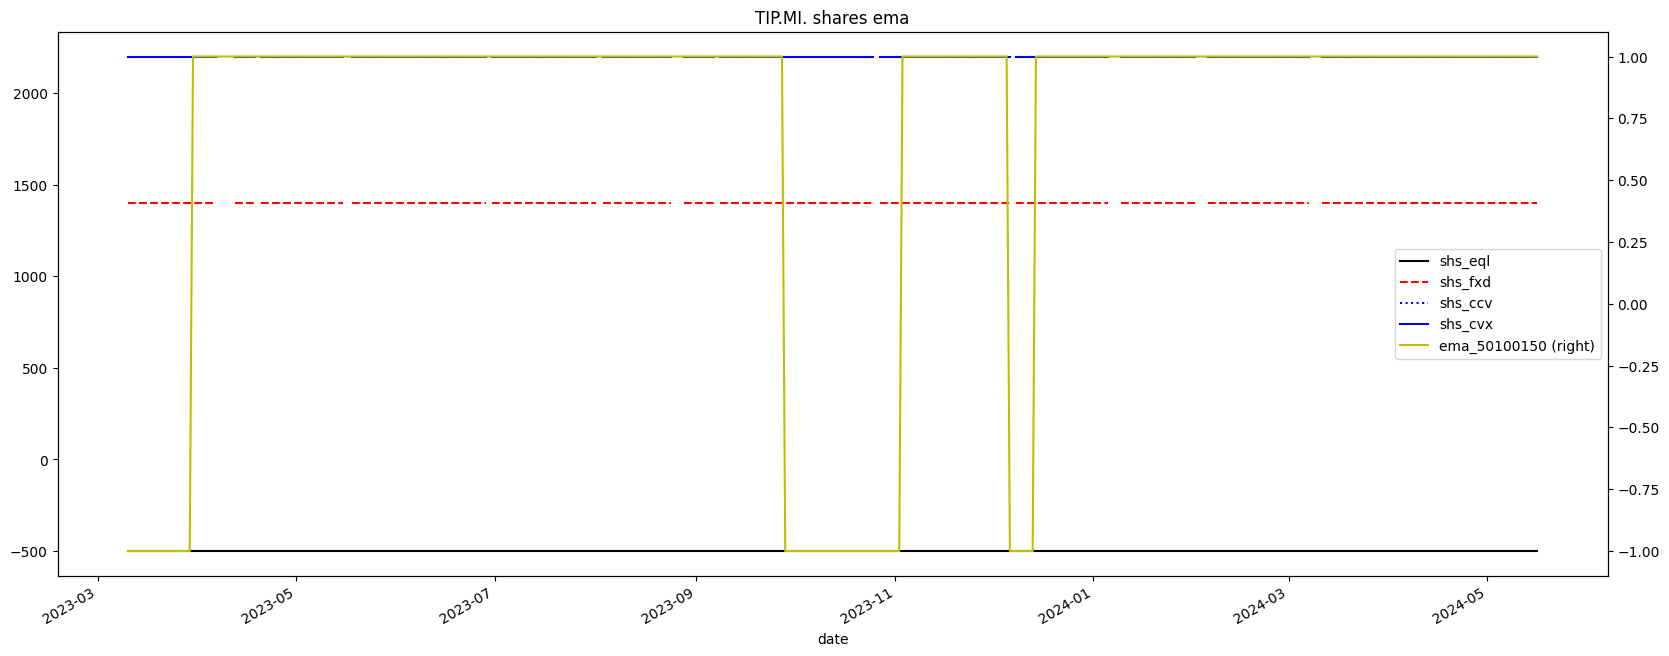

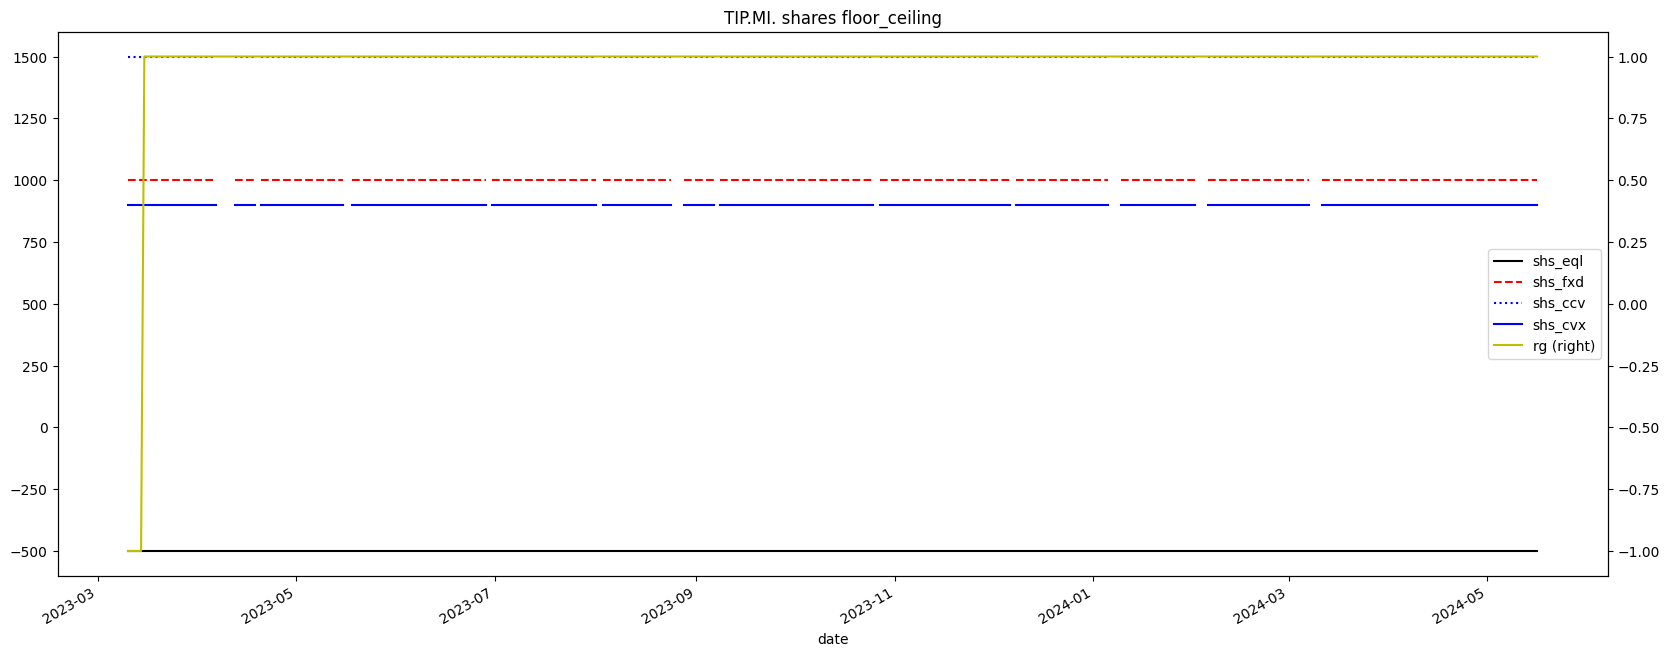

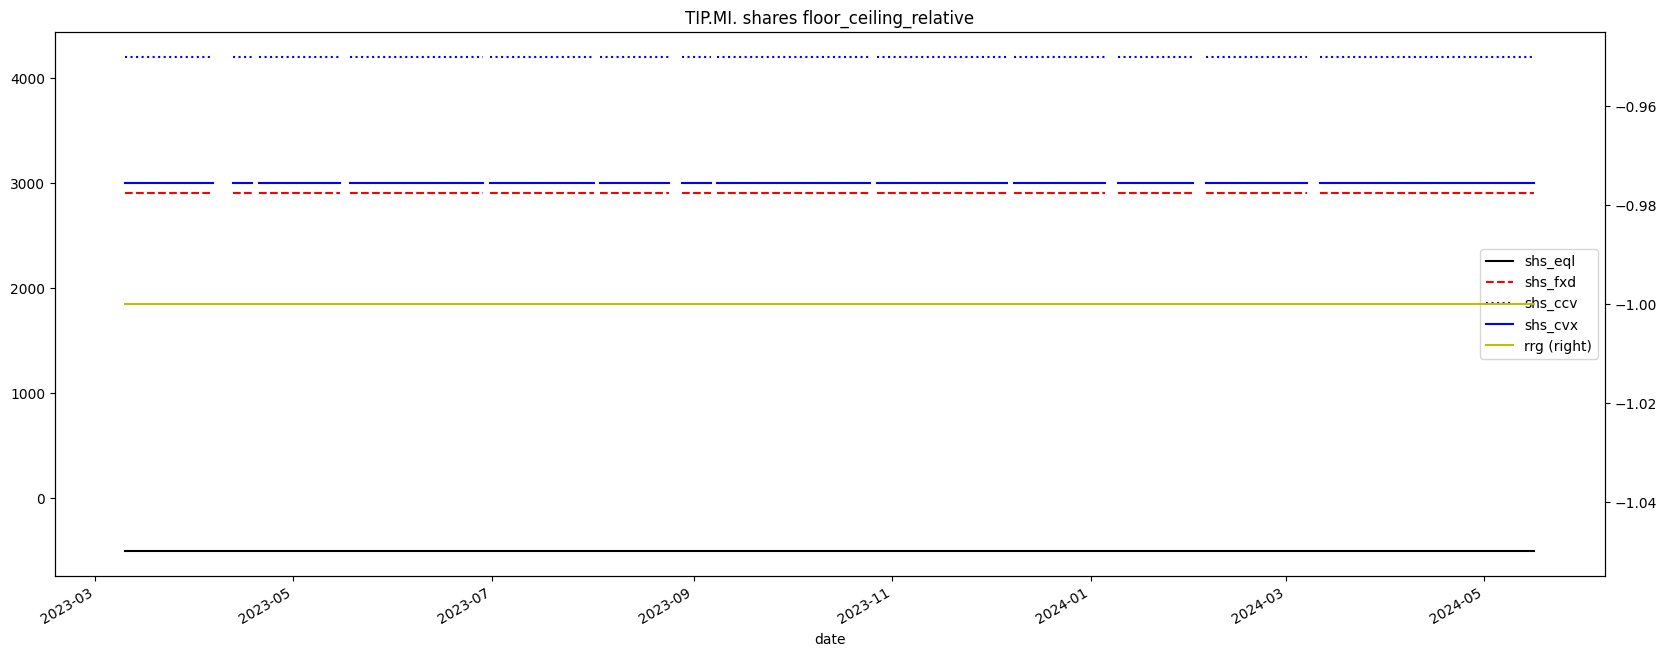

In [26]:
def plot_shares_signal(df, ticker, signal, m):
    df[['shs_eql','shs_fxd','shs_ccv','shs_cvx', signal]].plot(secondary_y=[signal],figsize=(20,8),style= ['k','r--','b:','b', 'y'],
                                                         title= str(ticker)+' shares ' + str(m))
    plt.show()
    
for i in range(len(signal)):  
    # print(i)
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    plot_shares_signal(output_signals[i].tail(300), ticker, signal[i], method[i])


In [27]:
df_fc
df_fc.dropna(subset=['hi3'])[['date', 'hi3', 'rh3']]

date    hi3  rh3
164  2016-08-24 07:00:00   3.76  NaN
354  2017-05-23 07:00:00   5.86  NaN
472  2017-11-06 08:00:00   6.25  NaN
525  2018-01-23 08:00:00   6.44  5.6
602  2018-05-15 07:00:00   6.37  NaN
696  2018-09-25 07:00:00   6.70  NaN
830  2019-04-08 07:00:00   6.41  NaN
1026 2020-01-20 08:00:00   7.34  NaN
1124 2020-06-09 07:00:00   6.34  NaN
1197 2020-09-18 07:00:00   6.30  NaN
1487 2021-11-08 08:00:00  10.54  NaN
1683 2022-08-16 07:00:00   8.45  NaN
1804 2023-02-02 08:00:00   8.20  NaN
1897 2023-06-16 07:00:00   9.38  NaN
2096 2024-03-27 08:00:00  10.12  NaN